In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import quandl
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

import warnings 
warnings.filterwarnings("ignore")


In [3]:
# Step 1: Choose historical or fictional catastrophic scenarios
# Define historical or fictional catastrophic scenarios
scenario1 = 'Financial Crisis 2008'
scenario2 = 'Global Pandemic 2020'
scenario3 = 'Current state'

In [4]:
# Step 2: Collect relevant data
#Scenario consists of 2008 to 2009 Global Market Crash
equity_df_S1 = pd.read_csv('scenario1.csv')
equity_df_S1.set_index('Date', inplace=True)
#Scenario consists of 2020 to 2021 Global Pandemic Crash
equity_df_S2 = pd.read_csv('scenario2.csv')
equity_df_S2.set_index('Date', inplace=True)
#Scenario consists of 2022 to 2023 Current Market
equity_df_S3 = pd.read_csv('scenario3.csv')
equity_df_S3.set_index('Date', inplace=True)

# Scenario : 1

In [5]:
equity_df_S1 = equity_df_S1[:-2]
equity_df_S1

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,SU,TSM,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2008-01-02,5.922569,39.886963,31.114080,36.161404,17.146896,28.495781,6.954747,11.885901,24.580635,21.650000,37.487286,5.629606,21.975302,53.676811,17.011454
2008-01-03,5.925303,39.394627,30.914616,36.486782,17.150400,28.299822,6.865836,12.025981,24.279039,21.600000,38.391598,5.553132,22.081486,53.613178,16.903481
2008-01-04,5.472994,38.402157,30.569427,35.390842,16.441441,27.657866,6.322497,11.844392,24.160551,21.459999,37.191555,5.253123,21.757017,52.179855,16.423611
2008-01-07,5.399739,38.574066,30.607784,35.650143,16.247498,27.934929,6.312618,12.051919,25.027657,21.139999,36.698593,5.147236,22.382360,52.206051,16.465605
2008-01-08,5.205503,37.472176,29.464788,35.373707,15.807808,26.826717,6.105161,12.176432,25.797819,21.139999,36.528618,5.153119,22.010691,51.270447,15.865759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-22,2.606247,14.587904,11.225162,18.179029,7.435185,20.700701,2.578393,9.499683,18.115841,17.379999,12.449348,4.666964,13.996621,33.020668,7.375927
2008-12-23,2.625700,14.223604,10.578038,18.028481,7.457958,20.207825,2.331421,9.416742,17.319908,17.059999,12.517641,4.666964,13.837920,32.668728,7.200906
2008-12-24,2.584968,14.231528,11.225162,18.156446,7.581331,20.721529,2.558635,9.405684,17.325518,16.790001,12.408379,4.648371,13.868431,32.798794,7.357177


In [6]:
equity_df_S1['Log_Return_AAPL'] = np.log(equity_df_S1['AAPL'] / equity_df_S1['AAPL'].shift(1))
equity_df_S1['Log_Return_AXP'] = np.log(equity_df_S1['AXP'] / equity_df_S1['AXP'].shift(1))
equity_df_S1['Log_Return_BAC'] = np.log(equity_df_S1['BAC'] / equity_df_S1['BAC'].shift(1))
equity_df_S1['Log_Return_EEM'] = np.log(equity_df_S1['EEM'] / equity_df_S1['EEM'].shift(1))
equity_df_S1['Log_Return_GOOGL'] = np.log(equity_df_S1['GOOGL'] / equity_df_S1['GOOGL'].shift(1))
equity_df_S1['Log_Return_JPM'] = np.log(equity_df_S1['JPM'] / equity_df_S1['JPM'].shift(1))
equity_df_S1['Log_Return_MU'] = np.log(equity_df_S1['MU'] / equity_df_S1['MU'].shift(1))
equity_df_S1['Log_Return_PFE'] = np.log(equity_df_S1['PFE'] / equity_df_S1['PFE'].shift(1))
equity_df_S1['Log_Return_SNY'] = np.log(equity_df_S1['SNY'] / equity_df_S1['SNY'].shift(1))
equity_df_S1['Log_Return_STRL'] = np.log(equity_df_S1['STRL'] / equity_df_S1['STRL'].shift(1))
equity_df_S1['Log_Return_SU'] = np.log(equity_df_S1['SU'] / equity_df_S1['SU'].shift(1))
equity_df_S1['Log_Return_TSM'] = np.log(equity_df_S1['TSM'] / equity_df_S1['TSM'].shift(1))
equity_df_S1['Log_Return_UL'] = np.log(equity_df_S1['UL'] / equity_df_S1['UL'].shift(1))
equity_df_S1['Log_Return_VTI'] = np.log(equity_df_S1['VTI'] / equity_df_S1['VTI'].shift(1))
equity_df_S1['Log_Return_XLF'] = np.log(equity_df_S1['XLF'] / equity_df_S1['XLF'].shift(1))
equity_df_S1

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,...,Log_Return_JPM,Log_Return_MU,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_TSM,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,5.922569,39.886963,31.114080,36.161404,17.146896,28.495781,6.954747,11.885901,24.580635,21.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,5.925303,39.394627,30.914616,36.486782,17.150400,28.299822,6.865836,12.025981,24.279039,21.600000,...,-0.006901,-0.012867,0.011716,-0.012346,-0.002312,0.023837,-0.013677,0.004820,-0.001186,-0.006367
2008-01-04,5.472994,38.402157,30.569427,35.390842,16.441441,27.657866,6.322497,11.844392,24.160551,21.459999,...,-0.022945,-0.082444,-0.015215,-0.004892,-0.006503,-0.031757,-0.055539,-0.014803,-0.027098,-0.028800
2008-01-07,5.399739,38.574066,30.607784,35.650143,16.247498,27.934929,6.312618,12.051919,25.027657,21.139999,...,0.009968,-0.001564,0.017369,0.035260,-0.015024,-0.013343,-0.020363,0.028337,0.000502,0.002554
2008-01-08,5.205503,37.472176,29.464788,35.373707,15.807808,26.826717,6.105161,12.176432,25.797819,21.139999,...,-0.040480,-0.033416,0.010278,0.030308,0.000000,-0.004642,0.001142,-0.016745,-0.018084,-0.037110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-22,2.606247,14.587904,11.225162,18.179029,7.435185,20.700701,2.578393,9.499683,18.115841,17.379999,...,-0.016628,-0.135923,-0.006961,-0.008626,-0.033384,-0.104099,-0.033946,-0.017723,-0.014149,-0.035793
2008-12-23,2.625700,14.223604,10.578038,18.028481,7.457958,20.207825,2.331421,9.416742,17.319908,17.059999,...,-0.024098,-0.100689,-0.008769,-0.044930,-0.018584,0.005471,0.000000,-0.011403,-0.010715,-0.024015
2008-12-24,2.584968,14.231528,11.225162,18.156446,7.581331,20.721529,2.558635,9.405684,17.325518,16.790001,...,0.025103,0.092996,-0.001175,0.000324,-0.015953,-0.008767,-0.003992,0.002202,0.003973,0.021469


In [7]:
mean_log_return1 = {}
mean_log_return1['AAPL_mean'] = equity_df_S1['Log_Return_AAPL'].mean()
mean_log_return1['AXP_mean'] = equity_df_S1['Log_Return_AXP'].mean()
mean_log_return1['BAC_mean'] = equity_df_S1['Log_Return_BAC'].mean()
mean_log_return1['EEM_mean'] = equity_df_S1['Log_Return_EEM'].mean()
mean_log_return1['GOOGL_mean'] = equity_df_S1['Log_Return_GOOGL'].mean()
mean_log_return1['JPM_mean'] = equity_df_S1['Log_Return_JPM'].mean()
mean_log_return1['MU_mean'] = equity_df_S1['Log_Return_MU'].mean()
mean_log_return1['TSM_mean'] = equity_df_S1['Log_Return_TSM'].mean()
mean_log_return1['PFE_mean'] = equity_df_S1['Log_Return_PFE'].mean()
mean_log_return1['SNY_mean'] = equity_df_S1['Log_Return_SNY'].mean()
mean_log_return1['STRL_mean'] = equity_df_S1['Log_Return_STRL'].mean()
mean_log_return1['SU_mean'] = equity_df_S1['Log_Return_SU'].mean()
mean_log_return1['UL_mean'] = equity_df_S1['Log_Return_UL'].mean()
mean_log_return1['VTI_mean'] = equity_df_S1['Log_Return_VTI'].mean()
mean_log_return1['XLF_mean'] = equity_df_S1['Log_Return_XLF'].mean()

In [8]:
#Risk Factor Change for Equity and ETFs:
mean_log_return1

{'AAPL_mean': -0.0032430544028311794,
 'AXP_mean': -0.004182915869260165,
 'BAC_mean': -0.004256353742271841,
 'EEM_mean': -0.002775816778600761,
 'GOOGL_mean': -0.003338203356164085,
 'JPM_mean': -0.0012837222667500643,
 'MU_mean': -0.0043717864044078335,
 'TSM_mean': -0.0006764359144913245,
 'PFE_mean': -0.000870848023440936,
 'SNY_mean': -0.0012943832891191675,
 'STRL_mean': -0.0007832280895695172,
 'SU_mean': -0.004292567227616079,
 'UL_mean': -0.0018517932028024604,
 'VTI_mean': -0.0019591750902059318,
 'XLF_mean': -0.0033835462257324335}

In [9]:
#Options Data for Leverage Factor for all 3 Scenarios:
Options_data1 = pd.DataFrame({
    'Date': ['2008-12-30', '2008-12-31'],
    'GOOGL Close': [0.67, 1.03],
    'MU Close': [0.52, 0.31],
    'AAPL Close':[0.2 , 0.15]
})
# set the Date column as the index
Options_data1.set_index('Date', inplace=True)

In [10]:
Options_data1

,GOOGL Close,MU Close,AAPL Close
Date,,,
2008-12-30,0.67,0.52,0.20
2008-12-31,1.03,0.31,0.15


In [11]:
#Stocks Data to calculate Leverage Factor :
#Underlying Data for Leverage Factor :
Underlying_data1 = pd.DataFrame({
    'Date': ['2008-12-30', '2008-12-31'],
    'GOOGL Close': [7.585335, 7.698949],
    'MU Close': [2.410452, 2.608030],
    'AAPL Close':[2.622965 , 2.594391]
})
# set the Date column as the index
Underlying_data1.set_index('Date', inplace=True)

In [12]:
Underlying_data1

,GOOGL Close,MU Close,AAPL Close
Date,,,
2008-12-30,7.585335,2.410452,2.622965
2008-12-31,7.698949,2.608030,2.594391


In [13]:
#To find the Delta:
Diff_bet_optoins_prices1 = pd.DataFrame()

Diff_bet_optoins_prices1['GOOGL_Vt-Vt-1'] = Options_data1['GOOGL Close'] - Options_data1['GOOGL Close'].shift(1)
Diff_bet_optoins_prices1['MU_Vt-Vt-1'] = Options_data1['MU Close'] - Options_data1['MU Close'].shift(1)
Diff_bet_optoins_prices1['AAPL_Vt-Vt-1'] = Options_data1['AAPL Close'] - Options_data1['AAPL Close'].shift(1)

In [14]:
Diff_bet_optoins_prices1.dropna()

,GOOGL_Vt-Vt-1,MU_Vt-Vt-1,AAPL_Vt-Vt-1
Date,,,
2008-12-31,0.36,-0.21,-0.05


In [15]:
# Difference Between Underlying:
Diff_bet_Underlying1 = pd.DataFrame()
Diff_bet_Underlying1['GOOGL'] = Underlying_data1['GOOGL Close'] - Underlying_data1['GOOGL Close'].shift(1)
Diff_bet_Underlying1['MU'] = Underlying_data1['MU Close'] - Underlying_data1['MU Close'].shift(1)
Diff_bet_Underlying1['AAPL'] = Underlying_data1['AAPL Close'] - Underlying_data1['AAPL Close'].shift(1)
Diff_bet_Underlying1.dropna()

,GOOGL,MU,AAPL
Date,,,
2008-12-31,0.113614,0.197578,-0.028574


In [16]:
# Price of underlying / Price of Options
result_df1 = pd.DataFrame()
result_df1['GOOGL'] = Underlying_data1['GOOGL Close'] / Options_data1['GOOGL Close']
result_df1['MU'] = Underlying_data1['MU Close'] / Options_data1['MU Close']
result_df1['AAPL'] = Underlying_data1['AAPL Close'] / Options_data1['AAPL Close']
result_df1 = result_df1.iloc[0]
result_df1

GOOGL    11.321396
MU        4.635485
AAPL     13.114825
Name: 2008-12-30, dtype: float64

In [17]:
#Delta Value 
Delta1 = pd.DataFrame()
# Price of underlying / Price of Options
Delta1['GOOGL'] = Diff_bet_optoins_prices1['GOOGL_Vt-Vt-1'] / Diff_bet_Underlying1['GOOGL']
Delta1['MU'] = Diff_bet_optoins_prices1['MU_Vt-Vt-1'] / Diff_bet_Underlying1['MU']
Delta1['AAPL'] = Diff_bet_optoins_prices1['AAPL_Vt-Vt-1'] / Diff_bet_Underlying1['AAPL']
Delta1.dropna()

,GOOGL,MU,AAPL
Date,,,
2008-12-31,3.168624,-1.062871,1.749843


In [18]:
#Loss of options = Delta * result_df
L_options1 = pd.DataFrame()
L_options1['GOOGL'] = Delta1['GOOGL'] * result_df1['GOOGL']
L_options1['MU'] = Delta1['MU'] * result_df1['MU']
L_options1['AAPL'] = Delta1['AAPL'] * result_df1['AAPL']

In [19]:
L_options1.dropna()

,GOOGL,MU,AAPL
Date,,,
2008-12-31,35.873241,-4.926924,22.948878


In [20]:
# Load CSV file into a DataFrame
Bond_df = pd.read_excel('OneYearBondData.xlsx')

Bond_df = Bond_df[:-1]
Bond_df

Bond_df['Date'] = equity_df_S1.index
Bond_df.set_index('Date', inplace=True)
Bond_df

,Bond1,Bond2
Date,,
2008-01-02,96.762750,97.804410
2008-01-03,96.776400,97.826610
2008-01-04,96.741060,97.654350
2008-01-07,96.764970,97.782500
2008-01-08,96.765200,97.662900
...,...,...
2008-12-22,98.363865,96.090750
2008-12-23,98.347175,97.374631
2008-12-24,98.752173,97.520778


In [21]:
import math
import pandas as pd

#Given parameters
t = 0.334  # current time
T = 1  # time to maturity of the bond

Bond1_Yield = pd.DataFrame()

# Calculate yield for each day
Bond1_Yield['Yield1'] = (-1 / (T - t)) * (Bond_df['Bond1'].apply(math.log))

#Bond1_Yield = Bond1_Yield[:-4]
# Display the updated DataFrame
print(Bond1_Yield)

              Yield1
Date                
2008-01-02 -6.865258
2008-01-03 -6.865470
2008-01-04 -6.864922
2008-01-07 -6.865293
2008-01-08 -6.865296
...              ...
2008-12-22 -6.889900
2008-12-23 -6.889645
2008-12-24 -6.895816
2008-12-26 -6.899387
2008-12-29 -6.886266

[251 rows x 1 columns]


In [22]:
#Bond1 Risk Factor Change :
Bond1_RFC = pd.DataFrame()

Bond1_RFC['RFC_B1'] = Bond1_Yield['Yield1'] - Bond1_Yield['Yield1'].shift(1)

Bond1_RFC

,RFC_B1
Date,
2008-01-02,NaN
2008-01-03,-0.000212
2008-01-04,0.000548
2008-01-07,-0.000371
2008-01-08,-0.000004
...,...
2008-12-22,0.003748
2008-12-23,0.000255
2008-12-24,-0.006171


In [23]:
Mean_Bond1_RFC = Bond1_RFC.mean()
Mean_Bond1_RFC

RFC_B1   -0.000084
dtype: float64

In [24]:
# Given parameters
t = 0.334  # current time
T = 1  # time to maturity of the bond

Bond2_Yield = pd.DataFrame()

# Calculate yield for each day
Bond2_Yield['Yield2'] = (-1 / (T - t)) * (Bond_df['Bond2'].apply(math.log))

#Bond2_Yield = Bond2_Yield[:-4]
# Display the updated DataFrame
print(Bond2_Yield)

              Yield2
Date                
2008-01-02 -6.881336
2008-01-03 -6.881677
2008-01-04 -6.879030
2008-01-07 -6.880999
2008-01-08 -6.879162
...              ...
2008-12-22 -6.854794
2008-12-23 -6.874723
2008-12-24 -6.876975
2008-12-26 -6.881568
2008-12-29 -6.878702

[251 rows x 1 columns]


In [25]:
#Bond1 Risk Factor Change :
Bond2_RFC = pd.DataFrame()

Bond2_RFC['RFC_B2'] = Bond2_Yield['Yield2'] - Bond2_Yield['Yield2'].shift(1)

Bond2_RFC

,RFC_B2
Date,
2008-01-02,NaN
2008-01-03,-0.000341
2008-01-04,0.002646
2008-01-07,-0.001969
2008-01-08,0.001838
...,...
2008-12-22,0.007177
2008-12-23,-0.019929
2008-12-24,-0.002252


In [26]:
Mean_Bond2_RFC = Bond2_RFC.mean()
Mean_Bond2_RFC

RFC_B2    0.000011
dtype: float64

In [27]:
#Covariance Matrix
Cov_DataFrame1 = equity_df_S1[['Log_Return_AAPL','Log_Return_AXP','Log_Return_BAC','Log_Return_EEM','Log_Return_GOOGL','Log_Return_JPM','Log_Return_MU','Log_Return_TSM','Log_Return_PFE','Log_Return_SNY','Log_Return_STRL','Log_Return_SU','Log_Return_UL','Log_Return_VTI','Log_Return_XLF']]

Cov_DataFrame1 = Cov_DataFrame1[:-6]
Cov_DataFrame1 = Cov_DataFrame1[4:]

Cov_DataFrame1.dropna()

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,
2008-01-08,-0.036634,-0.028982,-0.038058,-0.007784,-0.027435,-0.040480,-0.033416,0.001142,0.010278,0.030308,0.000000,-0.004642,-0.016745,-0.018084,-0.037110
2008-01-09,0.046493,0.023293,0.008555,0.032254,0.033500,0.014007,0.003231,0.033673,0.018991,0.018205,-0.003791,0.003437,-0.026342,0.010529,0.018727
2008-01-10,-0.007722,-0.003266,0.014352,0.011716,-0.009954,0.026230,0.000000,0.002205,0.006667,-0.010303,0.036368,-0.022037,-0.020573,0.006551,0.016925
2008-01-11,-0.030398,-0.105996,-0.020566,-0.028530,-0.013199,-0.011438,-0.017901,-0.021147,-0.002495,-0.001243,-0.012440,-0.015575,-0.061099,-0.009444,0.003277
2008-01-14,0.034658,0.011299,0.018529,0.014602,0.024102,0.012163,0.025933,0.017838,-0.002083,-0.012521,-0.008848,0.004132,0.014231,0.009588,0.013724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-12,0.033842,0.010378,0.001340,0.013827,0.050467,0.032855,0.112363,0.058527,0.021506,0.029650,0.109449,-0.032551,0.029414,0.009884,0.019143
2008-12-15,-0.036477,-0.050415,-0.056489,-0.013417,-0.016251,-0.077595,-0.085695,-0.009085,-0.017288,-0.001008,0.009137,0.015193,0.000000,-0.016606,-0.042094
2008-12-16,0.007151,0.036553,0.067811,0.076794,0.045955,0.122159,0.066182,0.089724,0.042960,0.071343,0.016977,0.070872,0.046891,0.051224,0.105962


In [28]:
#Risk Factor Change for Options is Going to be same as of their Underlying : 
Cov_DataFrame1['RFC_GOOGL_C'] = Cov_DataFrame1['Log_Return_GOOGL']
Cov_DataFrame1['RFC_MU_C'] = Cov_DataFrame1['Log_Return_MU']
Cov_DataFrame1['RFC_AAPL_P'] = Cov_DataFrame1['Log_Return_AAPL']
Cov_DataFrame1['RFC_B1'] = Bond1_RFC['RFC_B1']
Cov_DataFrame1['RFC_B2'] = Bond2_RFC['RFC_B2']
Cov_DataFrame1

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_P,RFC_B1,RFC_B2
Date,,,,,,,,,,,,,,,,,,,,
2008-01-08,-0.036634,-0.028982,-0.038058,-0.007784,-0.027435,-0.040480,-0.033416,0.001142,0.010278,0.030308,0.000000,-0.004642,-0.016745,-0.018084,-0.037110,-0.027435,-0.033416,-0.036634,-0.000004,0.001838
2008-01-09,0.046493,0.023293,0.008555,0.032254,0.033500,0.014007,0.003231,0.033673,0.018991,0.018205,-0.003791,0.003437,-0.026342,0.010529,0.018727,0.033500,0.003231,0.046493,0.000601,0.002401
2008-01-10,-0.007722,-0.003266,0.014352,0.011716,-0.009954,0.026230,0.000000,0.002205,0.006667,-0.010303,0.036368,-0.022037,-0.020573,0.006551,0.016925,-0.009954,0.000000,-0.007722,0.000780,0.000784
2008-01-11,-0.030398,-0.105996,-0.020566,-0.028530,-0.013199,-0.011438,-0.017901,-0.021147,-0.002495,-0.001243,-0.012440,-0.015575,-0.061099,-0.009444,0.003277,-0.013199,-0.017901,-0.030398,0.000705,0.002646
2008-01-14,0.034658,0.011299,0.018529,0.014602,0.024102,0.012163,0.025933,0.017838,-0.002083,-0.012521,-0.008848,0.004132,0.014231,0.009588,0.013724,0.024102,0.025933,0.034658,0.000403,0.001425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-12,0.033842,0.010378,0.001340,0.013827,0.050467,0.032855,0.112363,0.058527,0.021506,0.029650,0.109449,-0.032551,0.029414,0.009884,0.019143,0.050467,0.112363,0.033842,0.002399,0.004479
2008-12-15,-0.036477,-0.050415,-0.056489,-0.013417,-0.016251,-0.077595,-0.085695,-0.009085,-0.017288,-0.001008,0.009137,0.015193,0.000000,-0.016606,-0.042094,-0.016251,-0.085695,-0.036477,0.002496,-0.010761
2008-12-16,0.007151,0.036553,0.067811,0.076794,0.045955,0.122159,0.066182,0.089724,0.042960,0.071343,0.016977,0.070872,0.046891,0.051224,0.105962,0.045955,0.066182,0.007151,0.000938,0.001513


In [29]:
# Calculate covariance matrix
covariance_matrix1 = Cov_DataFrame1.cov()

# Print covariance matrix
covariance_matrix1 

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_P,RFC_B1,RFC_B2
Log_Return_AAPL,0.001400,0.001035,0.001267,0.001114,0.000844,0.001038,0.000890,0.000767,0.000476,0.000532,0.000995,0.000923,3.886315e-04,0.000627,0.000974,0.000844,0.000890,0.001400,-8.047036e-06,0.000043
Log_Return_AXP,0.001035,0.002200,0.002333,0.001459,0.000929,0.001863,0.001664,0.001069,0.000835,0.000761,0.001197,0.001101,7.055545e-04,0.000989,0.001766,0.000929,0.001664,0.001035,-1.364138e-05,0.000038
Log_Return_BAC,0.001267,0.002333,0.004126,0.001842,0.001104,0.002986,0.002025,0.001351,0.001087,0.001026,0.001709,0.001246,8.426802e-04,0.001268,0.002708,0.001104,0.002025,0.001267,-3.876440e-05,0.000026
Log_Return_EEM,0.001114,0.001459,0.001842,0.002006,0.000989,0.001453,0.001480,0.001331,0.000839,0.000945,0.001355,0.001568,7.112129e-04,0.001052,0.001538,0.000989,0.001480,0.001114,-6.801222e-06,0.000060
Log_Return_GOOGL,0.000844,0.000929,0.001104,0.000989,0.001222,0.000956,0.000835,0.000686,0.000483,0.000544,0.000914,0.000786,4.492590e-04,0.000602,0.000942,0.001222,0.000835,0.000844,-2.478828e-06,0.000043
Log_Return_JPM,0.001038,0.001863,0.002986,0.001453,0.000956,0.002916,0.001651,0.001163,0.000824,0.000850,0.001595,0.000800,6.874242e-04,0.000997,0.002224,0.000956,0.001651,0.001038,-2.050146e-05,0.000023
Log_Return_MU,0.000890,0.001664,0.002025,0.001480,0.000835,0.001651,0.003505,0.001094,0.000788,0.000814,0.001056,0.001310,6.535128e-04,0.000953,0.001556,0.000835,0.003505,0.000890,1.003199e-05,0.000062
Log_Return_TSM,0.000767,0.001069,0.001351,0.001331,0.000686,0.001163,0.001094,0.001344,0.000570,0.000615,0.000988,0.000976,4.947290e-04,0.000719,0.001156,0.000686,0.001094,0.000767,-5.595377e-06,0.000046
Log_Return_PFE,0.000476,0.000835,0.001087,0.000839,0.000483,0.000824,0.000788,0.000570,0.000581,0.000490,0.000641,0.000580,3.780280e-04,0.000534,0.000841,0.000483,0.000788,0.000476,-1.069789e-05,0.000026
Log_Return_SNY,0.000532,0.000761,0.001026,0.000945,0.000544,0.000850,0.000814,0.000615,0.000490,0.000861,0.000710,0.000803,4.874336e-04,0.000570,0.000856,0.000544,0.000814,0.000532,-3.010079e-06,0.000022


In [30]:
#Loss Distribution Of Equity :
# Stock quantities
stocks_qty_Senario1 = {'AAPL': 15000, 'APTV': 2107, 'BAC': 2673, 'EEM': 1652, 'GOOGL': 3957, 'MU': 1447, 'JPM': 11725, 'MVST': 3189, 'PFE': 1731, 'SNY': 1786, 'STRL': 2417, 'SU': 6453, 'UL': 2163, 'VTI': 914, 'XLF': 4077}

# Stock prices
stock_prices1 = [2.584968, 14.231528, 11.225162, 18.156446, 7.581331, 20.721529, 2.558635, 9.405684, 17.325518, 16.790001, 12.408379, 4.648371, 13.868431, 32.798794, 7.357177]

# Calculate the loss distribution for each stock
loss_distribution1 = {}
for stock, qty in stocks_qty_Senario1.items():
    stock_price1 = stock_prices1.pop(0)
    loss = qty * stock_price1
    loss_distribution1[stock] = loss

# Print the loss distribution for each stock
print("Loss Distribution for Each Stock:")
for stock, loss in loss_distribution1.items():
    print(f"{stock}: {loss}")


Loss Distribution for Each Stock:
AAPL: 38774.52
APTV: 29985.829496000002
BAC: 30004.858025999998
EEM: 29994.448792
GOOGL: 29999.326767
MU: 29984.052463
JPM: 29999.995375000002
MVST: 29994.726276
PFE: 29990.471658
SNY: 29986.941786
STRL: 29991.052043
SU: 29995.938063
UL: 29997.416253
VTI: 29978.097716
XLF: 29995.210629


In [31]:
#Loss Distribution for Options :
# GOOGL :

# Price of underlying asset
Number_of_Options_GOOGL1 = 30
Price_of_Underlying_GOOGL1 = 0.57
# Loss factor for options
loss_factor_option_GOOGL1 = 35.873241 

# Calculate the loss distribution for options
loss_distribution_options_GOOGL1 = Number_of_Options_GOOGL1 * Price_of_Underlying_GOOGL1 * loss_factor_option_GOOGL1
print("Loss Distribution of GOOGL option :", loss_distribution_options_GOOGL1)


# MU

# Price of underlying asset
Number_of_Options_MU1 = 14
Price_of_Underlying_MU1 = 0.05
# Loss factor for options
loss_factor_option_MU1 = -4.926924

# Calculate the loss distribution for options
loss_distribution_options_MU1 = Number_of_Options_MU1 * Price_of_Underlying_MU1 * loss_factor_option_MU1
print("Loss Distribution of MU option :", loss_distribution_options_MU1)

#AAPL

# Price of underlying asset
Number_of_Options_AAPL1 = 15
Price_of_Underlying_AAPL1 = 0.01
# Loss factor for options
loss_factor_option_AAPL1 = 22.948878

# Calculate the loss distribution for options
loss_distribution_options_AAPL1 = Number_of_Options_AAPL1 * Price_of_Underlying_AAPL1 * loss_factor_option_AAPL1
print("Loss Distribution of APPL option :", loss_distribution_options_AAPL1)

Loss Distribution of GOOGL option : 613.4324210999999
Loss Distribution of MU option : -3.4488468
Loss Distribution of APPL option : 3.4423317


In [32]:
#Loss Distribution of Bonds :
#Bond1:
Num_Bond1 = 3084
Bond1_Price = 97.29100
Time_maturity_Bond1 = 0.6
Loss_Dis_Bond1_S1 =  Num_Bond1*Bond1_Price*Time_maturity_Bond1
print("Loss Distribution of Bond1 :", Loss_Dis_Bond1_S1)

#Bond1:
Num_Bond2 = 3332
Bond2_Price = 96.021532
Time_maturity_Bond2 = 1.5
Loss_Dis_Bond2_S1 =  Num_Bond2*Bond2_Price*Time_maturity_Bond2
print("Loss Distribution of Bond2 :", Loss_Dis_Bond2_S1)

Loss Distribution of Bond1 : 180027.2664
Loss Distribution of Bond2 : 479915.61693599995


In [33]:
#This is a C Vector:
## Create a list to store the loss distributions
portfolio_loss_distribution1 = []

# Append the loss distributions for stocks to the list
for stock, loss in loss_distribution1.items():
    portfolio_loss_distribution1.append(loss)

# Append the loss distributions for options to the list
portfolio_loss_distribution1.append(loss_distribution_options_GOOGL1)
portfolio_loss_distribution1.append(loss_distribution_options_MU1)
portfolio_loss_distribution1.append(loss_distribution_options_AAPL1)

# Append the loss distributions for bonds to the list
portfolio_loss_distribution1.append(Loss_Dis_Bond1_S1)
portfolio_loss_distribution1.append(Loss_Dis_Bond2_S1)

portfolio_loss_distribution1

[38774.52,
 29985.829496000002,
 30004.858025999998,
 29994.448792,
 29999.326767,
 29984.052463,
 29999.995375000002,
 29994.726276,
 29990.471658,
 29986.941786,
 29991.052043,
 29995.938063,
 29997.416253,
 29978.097716,
 29995.210629,
 613.4324210999999,
 -3.4488468,
 3.4423317,
 180027.2664,
 479915.61693599995]

In [34]:
portfolio_loss_distribution1

[38774.52,
 29985.829496000002,
 30004.858025999998,
 29994.448792,
 29999.326767,
 29984.052463,
 29999.995375000002,
 29994.726276,
 29990.471658,
 29986.941786,
 29991.052043,
 29995.938063,
 29997.416253,
 29978.097716,
 29995.210629,
 613.4324210999999,
 -3.4488468,
 3.4423317,
 180027.2664,
 479915.61693599995]

In [35]:
#To find the Portfolio's Mean :
mean_log_return1

{'AAPL_mean': -0.0032430544028311794,
 'AXP_mean': -0.004182915869260165,
 'BAC_mean': -0.004256353742271841,
 'EEM_mean': -0.002775816778600761,
 'GOOGL_mean': -0.003338203356164085,
 'JPM_mean': -0.0012837222667500643,
 'MU_mean': -0.0043717864044078335,
 'TSM_mean': -0.0006764359144913245,
 'PFE_mean': -0.000870848023440936,
 'SNY_mean': -0.0012943832891191675,
 'STRL_mean': -0.0007832280895695172,
 'SU_mean': -0.004292567227616079,
 'UL_mean': -0.0018517932028024604,
 'VTI_mean': -0.0019591750902059318,
 'XLF_mean': -0.0033835462257324335}

In [36]:
# Convert dictionary values to a list
mean_log_return_list1 = list(mean_log_return1.values())
mean_log_return_list1

[-0.0032430544028311794,
 -0.004182915869260165,
 -0.004256353742271841,
 -0.002775816778600761,
 -0.003338203356164085,
 -0.0012837222667500643,
 -0.0043717864044078335,
 -0.0006764359144913245,
 -0.000870848023440936,
 -0.0012943832891191675,
 -0.0007832280895695172,
 -0.004292567227616079,
 -0.0018517932028024604,
 -0.0019591750902059318,
 -0.0033835462257324335]

In [37]:
Options_Mean1 = [-0.003177513409651724, -0.003892179847518114, -0.0032754698949746]
mean_log_return_list1.extend(Options_Mean1)

In [38]:
Bonds_Mean = [-0.000084 , 0.000003]
mean_log_return_list1.extend(Bonds_Mean)
mean_log_return_list1

[-0.0032430544028311794,
 -0.004182915869260165,
 -0.004256353742271841,
 -0.002775816778600761,
 -0.003338203356164085,
 -0.0012837222667500643,
 -0.0043717864044078335,
 -0.0006764359144913245,
 -0.000870848023440936,
 -0.0012943832891191675,
 -0.0007832280895695172,
 -0.004292567227616079,
 -0.0018517932028024604,
 -0.0019591750902059318,
 -0.0033835462257324335,
 -0.003177513409651724,
 -0.003892179847518114,
 -0.0032754698949746,
 -8.4e-05,
 3e-06]

In [39]:
#Portfolio Mean:
portfolio_mean1 = np.dot(portfolio_loss_distribution1, mean_log_return_list1)
portfolio_mean1 

-1200.8068698379475

In [40]:
#Varriance of Portfolio:
portfolio_varriance1 = np.dot(portfolio_loss_distribution1 ,covariance_matrix1)
portfolio_varriance1 = np.dot(portfolio_varriance1.T , portfolio_loss_distribution1 )
portfolio_varriance1

259300493.6931949

In [41]:
#Std deviation : 
Std_deviation1 = portfolio_varriance1**0.5
Std_deviation1

16102.810117901623

In [42]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
alpha2 = 0.03 # 97% confidence level
# Calculate volatility over the horizon
sig_h = Std_deviation1

# Calculate VaR for the portfolio for 0.95
VaR_n_1 = norm.ppf(1 - alpha1) * sig_h + portfolio_mean1

# Calculate VaR for the portfolio for 0.97
VaR_n_2 = norm.ppf(1 - alpha2) * sig_h + portfolio_mean1

print("95% VaR is", round(VaR_n_1, 2))
print("97% VaR is", round(VaR_n_2, 2))

95% VaR is 25285.96
97% VaR is 29085.26


In [43]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level

# Calculate volatility over the horizon
sig_h = Std_deviation1 


# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_n1 = (1 / (1 - alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean1

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_n2 = (1 / (1 - alpha2)) * (norm.pdf(norm.ppf(alpha2)) * sig_h) + portfolio_mean1

print("95% CVaR/ES is", round(ES_n1, 2))
print("97% CVaR/ES is", round(ES_n2, 2))

95% CVaR/ES is 32014.67
97% CVaR/ES is 35321.41


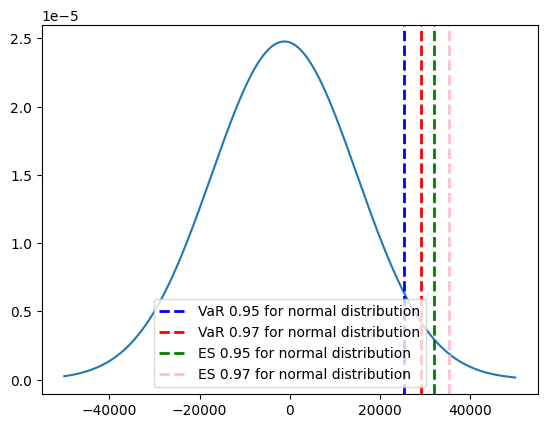

In [44]:
from scipy.stats import norm
x_axis  = np.arange(-50000,50000, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, portfolio_mean1,Std_deviation1))
plt.axvline(x=VaR_n_1, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for normal distribution' )
plt.axvline(x=VaR_n_2, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for normal distribution' )
plt.axvline(x=ES_n1, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for normal distribution' )
plt.axvline(x=ES_n2, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for normal distribution' )
plt.legend()
plt.show()

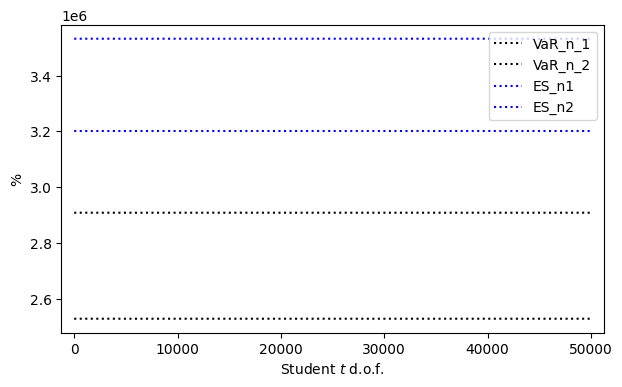

In [45]:
# Plot VaR and CVaR for the normal and t-distributions
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(np.arange(0,50000), VaR_n_1*np.ones(50000)*100, ":k", label="VaR_n_1")
plt.plot(np.arange(0,50000), VaR_n_2*np.ones(50000)*100, ":k", label="VaR_n_2")
plt.plot(np.arange(0,50000), ES_n1*np.ones(50000)*100, ":b", label="ES_n1")
plt.plot(np.arange(0,50000), ES_n2*np.ones(50000)*100, ":b",label="ES_n2" )
plt.xlabel("Student $t$ d.o.f.")
plt.ylabel("%")
plt.legend(loc=1)
ax.margins(x=0.025, y=0.05) # add extra padding
plt.show()

In [47]:
# Horizon and confidence levels
import math
from scipy.stats import t

# Input variables
mean =  portfolio_mean1  # Portfolio mean
std_dev = Std_deviation1 # Portfolio standard deviation
conf_level_1 = 0.95   # 95% confidence level
conf_level_2 = 0.97
sample_size = 20   # Portfolio sample size

# Calculate t-statistic
df = sample_size - 1 if sample_size < 30 else math.inf
t_stat_1 = t.ppf(conf_level_1, df)
t_stat_2 = t.ppf(conf_level_2, df)

# Calculate VaR
var_t_1 = (t_stat_1 * std_dev) + mean

var_t_2 = (t_stat_2 * std_dev) + mean

print("95% CVaR/ES t-distribution is", round(var_t_1, 2))
print("97% CVaR/ES t-distribution is", round(var_t_2, 2))

95% CVaR/ES t-distribution is 26643.09
97% CVaR/ES t-distribution is 31005.09


In [49]:
# Horizon and confidence levels
import math
from scipy.stats import t
 
# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level
portfolio_size = 20
# Calculate degrees of freedom for t-distribution
n = portfolio_size - 1

# Calculate volatility over the horizon
sig_h_t = Std_deviation1 

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_t_1 = ((t.pdf(t.ppf(alpha1, n), n) / (1 - alpha1)) * sig_h_t) + portfolio_mean1

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_t_2 =  ((t.pdf(t.ppf(alpha2, n), n) / (1 - alpha2)) * sig_h_t) + portfolio_mean1 

print("95% CVaR/ES t-distribution is", round(ES_t_1, 2))
print("97% CVaR/ES t-distribution is", round(ES_t_2, 2))

95% CVaR/ES t-distribution is 28205.02
97% CVaR/ES t-distribution is 30076.05


# Scenario 2

In [50]:
equity_df_S2

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,SU,TSM,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2020-01-02,73.449394,120.207726,33.064255,43.166508,68.433998,126.807846,54.719242,32.951447,45.306236,14.150000,28.684843,56.058468,50.834091,156.788986,29.014105
2020-01-03,72.735306,119.013771,32.377735,42.365028,68.075996,125.134407,53.869648,32.774651,45.377754,14.240000,28.719845,54.209763,50.762779,155.791153,28.706041
2020-01-06,73.314880,118.497971,32.331345,42.261314,69.890503,125.034920,52.921272,32.732552,45.815796,14.350000,29.673674,53.584194,50.816261,156.323349,28.687372
2020-01-07,72.970078,117.877121,32.117970,42.233028,69.755501,122.909256,57.564362,32.623108,45.359875,14.320000,29.839937,54.452522,49.996071,155.952682,28.500664
2020-01-08,74.143898,119.911606,32.442677,42.478184,70.251999,123.868050,56.823441,32.884094,45.574421,14.350000,29.673674,54.854004,49.782104,156.722443,28.687372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.205795,113.695747,28.540174,48.033951,86.708000,115.979340,69.725296,34.422447,43.992580,19.260000,15.598845,101.574356,54.028095,186.508774,27.727505
2020-12-28,134.862701,114.674286,28.702118,48.168098,88.697998,116.743095,69.804321,34.006828,44.437607,19.520000,15.553234,101.746887,54.405594,187.688828,27.861595
2020-12-29,133.067017,114.461151,28.587803,48.886742,87.888000,116.435730,69.359779,34.219257,44.743561,18.760000,15.370792,101.181358,55.363148,186.905350,27.765816


In [51]:
equity_df_S2 = equity_df_S2[:-2]
equity_df_S2

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,SU,TSM,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2020-01-02,73.449394,120.207726,33.064255,43.166508,68.433998,126.807846,54.719242,32.951447,45.306236,14.150000,28.684843,56.058468,50.834091,156.788986,29.014105
2020-01-03,72.735306,119.013771,32.377735,42.365028,68.075996,125.134407,53.869648,32.774651,45.377754,14.240000,28.719845,54.209763,50.762779,155.791153,28.706041
2020-01-06,73.314880,118.497971,32.331345,42.261314,69.890503,125.034920,52.921272,32.732552,45.815796,14.350000,29.673674,53.584194,50.816261,156.323349,28.687372
2020-01-07,72.970078,117.877121,32.117970,42.233028,69.755501,122.909256,57.564362,32.623108,45.359875,14.320000,29.839937,54.452522,49.996071,155.952682,28.500664
2020-01-08,74.143898,119.911606,32.442677,42.478184,70.251999,123.868050,56.823441,32.884094,45.574421,14.350000,29.673674,54.854004,49.782104,156.722443,28.687372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,130.116959,110.982948,27.825718,47.756073,86.011002,113.324814,69.586975,33.932941,44.326355,19.000000,14.996781,99.628555,53.420422,185.879395,27.239042
2020-12-23,129.209290,113.308197,28.625908,48.244751,86.411499,116.491631,69.102921,34.579460,44.113110,19.129999,15.671822,99.456024,53.761086,186.197296,27.689196
2020-12-24,130.205795,113.695747,28.540174,48.033951,86.708000,115.979340,69.725296,34.422447,43.992580,19.260000,15.598845,101.574356,54.028095,186.508774,27.727505


In [52]:
equity_df_S2['Log_Return_AAPL'] = np.log(equity_df_S2['AAPL'] / equity_df_S2['AAPL'].shift(1))
equity_df_S2['Log_Return_AXP'] = np.log(equity_df_S2['AXP'] / equity_df_S2['AXP'].shift(1))
equity_df_S2['Log_Return_BAC'] = np.log(equity_df_S2['BAC'] / equity_df_S2['BAC'].shift(1))
equity_df_S2['Log_Return_EEM'] = np.log(equity_df_S2['EEM'] / equity_df_S2['EEM'].shift(1))
equity_df_S2['Log_Return_GOOGL'] = np.log(equity_df_S2['GOOGL'] / equity_df_S2['GOOGL'].shift(1))
equity_df_S2['Log_Return_JPM'] = np.log(equity_df_S2['JPM'] / equity_df_S2['JPM'].shift(1))
equity_df_S2['Log_Return_MU'] = np.log(equity_df_S2['MU'] / equity_df_S2['MU'].shift(1))
equity_df_S2['Log_Return_PFE'] = np.log(equity_df_S2['PFE'] / equity_df_S2['PFE'].shift(1))
equity_df_S2['Log_Return_SNY'] = np.log(equity_df_S2['SNY'] / equity_df_S2['SNY'].shift(1))
equity_df_S2['Log_Return_STRL'] = np.log(equity_df_S2['STRL'] / equity_df_S2['STRL'].shift(1))
equity_df_S2['Log_Return_SU'] = np.log(equity_df_S2['SU'] / equity_df_S2['SU'].shift(1))
equity_df_S2['Log_Return_TSM'] = np.log(equity_df_S2['TSM'] / equity_df_S2['TSM'].shift(1))
equity_df_S2['Log_Return_UL'] = np.log(equity_df_S2['UL'] / equity_df_S2['UL'].shift(1))
equity_df_S2['Log_Return_VTI'] = np.log(equity_df_S2['VTI'] / equity_df_S2['VTI'].shift(1))
equity_df_S2['Log_Return_XLF'] = np.log(equity_df_S2['XLF'] / equity_df_S2['XLF'].shift(1))
equity_df_S2

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,...,Log_Return_JPM,Log_Return_MU,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_TSM,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.449394,120.207726,33.064255,43.166508,68.433998,126.807846,54.719242,32.951447,45.306236,14.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.735306,119.013771,32.377735,42.365028,68.075996,125.134407,53.869648,32.774651,45.377754,14.240000,...,-0.013285,-0.015648,-0.005380,0.001577,0.006340,0.001219,-0.033534,-0.001404,-0.006385,-0.010674
2020-01-06,73.314880,118.497971,32.331345,42.261314,69.890503,125.034920,52.921272,32.732552,45.815796,14.350000,...,-0.000795,-0.017762,-0.001285,0.009607,0.007695,0.032672,-0.011607,0.001053,0.003410,-0.000651
2020-01-07,72.970078,117.877121,32.117970,42.233028,69.755501,122.909256,57.564362,32.623108,45.359875,14.320000,...,-0.017147,0.084098,-0.003349,-0.010001,-0.002093,0.005587,0.016075,-0.016272,-0.002374,-0.006530
2020-01-08,74.143898,119.911606,32.442677,42.478184,70.251999,123.868050,56.823441,32.884094,45.574421,14.350000,...,0.007771,-0.012955,0.007968,0.004719,0.002093,-0.005587,0.007346,-0.004289,0.004924,0.006530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,130.116959,110.982948,27.825718,47.756073,86.011002,113.324814,69.586975,33.932941,44.326355,19.000000,...,-0.015334,-0.014517,-0.017270,0.016662,-0.008386,-0.027596,-0.008526,-0.000861,0.000207,-0.009797
2020-12-23,129.209290,113.308197,28.625908,48.244751,86.411499,116.491631,69.102921,34.579460,44.113110,19.129999,...,0.027561,-0.006980,0.018874,-0.004822,0.006819,0.044029,-0.001733,0.006357,0.001709,0.016391
2020-12-24,130.205795,113.695747,28.540174,48.033951,86.708000,115.979340,69.725296,34.422447,43.992580,19.260000,...,-0.004407,0.008966,-0.004551,-0.002736,0.006773,-0.004667,0.021076,0.004954,0.001671,0.001383


In [53]:
mean_log_return2 = {}
mean_log_return2['AAPL_mean'] = equity_df_S2['Log_Return_AAPL'].mean()
mean_log_return2['AXP_mean'] = equity_df_S2['Log_Return_AXP'].mean()
mean_log_return2['BAC_mean'] = equity_df_S2['Log_Return_BAC'].mean()
mean_log_return2['EEM_mean'] = equity_df_S2['Log_Return_EEM'].mean()
mean_log_return2['GOOGL_mean'] = equity_df_S2['Log_Return_GOOGL'].mean()
mean_log_return2['JPM_mean'] = equity_df_S2['Log_Return_JPM'].mean()
mean_log_return2['MU_mean'] = equity_df_S2['Log_Return_MU'].mean()
mean_log_return2['TSM_mean'] = equity_df_S2['Log_Return_TSM'].mean()
mean_log_return2['PFE_mean'] = equity_df_S2['Log_Return_PFE'].mean()
mean_log_return2['SNY_mean'] = equity_df_S2['Log_Return_SNY'].mean()
mean_log_return2['STRL_mean'] = equity_df_S2['Log_Return_STRL'].mean()
mean_log_return2['SU_mean'] = equity_df_S2['Log_Return_SU'].mean()
mean_log_return2['UL_mean'] = equity_df_S2['Log_Return_UL'].mean()
mean_log_return2['VTI_mean'] = equity_df_S2['Log_Return_VTI'].mean()
mean_log_return2['XLF_mean'] = equity_df_S2['Log_Return_XLF'].mean()
mean_log_return2

{'AAPL_mean': 0.00237702492153498,
 'AXP_mean': -0.00019594327347745023,
 'BAC_mean': -0.0005818905115292582,
 'EEM_mean': 0.0004977652689995668,
 'GOOGL_mean': 0.0010007741306153658,
 'JPM_mean': -0.00034133388326773194,
 'MU_mean': 0.0009483669148811296,
 'TSM_mean': 0.002362077274565309,
 'PFE_mean': 0.00015101362122079898,
 'SNY_mean': -4.998859009996537e-05,
 'STRL_mean': 0.00112804943459339,
 'SU_mean': -0.0024955990261037063,
 'UL_mean': 0.00034138781289268124,
 'VTI_mean': 0.0007028058925265073,
 'XLF_mean': -0.00017590588565817}

In [54]:
#Options Data for Leverage Factor for all 3 Scenarios:
Options_data2 = pd.DataFrame({
    'Date': ['2020-12-30', '2020-12-31'],
    'GOOGL Close': [2.3, 3.1],
    'MU Close': [1.5, 2.1],
    'AAPL Close':[0.7 , 0.2]
})
# set the Date column as the index
Options_data2.set_index('Date', inplace=True)
Options_data2

,GOOGL Close,MU Close,AAPL Close
Date,,,
2020-12-30,2.3,1.5,0.7
2020-12-31,3.1,2.1,0.2


In [55]:
#Stocks Data to calculate Leverage Factor :
#Underlying Data for Leverage Factor :
Underlying_data2 = pd.DataFrame({
    'Date': ['2020-12-30', '2020-12-31'],
    'GOOGL Close': [86.812500 , 87.632004],
    'MU Close': [71.049049, 74.269592],
    'AAPL Close':[131.932358 , 130.916168]
})
# set the Date column as the index
Underlying_data2.set_index('Date', inplace=True)
Underlying_data2

,GOOGL Close,MU Close,AAPL Close
Date,,,
2020-12-30,86.812500,71.049049,131.932358
2020-12-31,87.632004,74.269592,130.916168


In [56]:
#To find the Delta:
Diff_bet_optoins_prices2 = pd.DataFrame()

Diff_bet_optoins_prices2['GOOGL_Vt-Vt-1'] = Options_data2['GOOGL Close'] - Options_data2['GOOGL Close'].shift(1)
Diff_bet_optoins_prices2['MU_Vt-Vt-1'] = Options_data2['MU Close'] - Options_data2['MU Close'].shift(1)
Diff_bet_optoins_prices2['AAPL_Vt-Vt-1'] = Options_data2['AAPL Close'] - Options_data2['AAPL Close'].shift(1)
Diff_bet_optoins_prices2.dropna()

,GOOGL_Vt-Vt-1,MU_Vt-Vt-1,AAPL_Vt-Vt-1
Date,,,
2020-12-31,0.8,0.6,-0.5


In [57]:
# Difference Between Underlying:
Diff_bet_Underlying2 = pd.DataFrame()
Diff_bet_Underlying2['GOOGL'] = Underlying_data2['GOOGL Close'] - Underlying_data2['GOOGL Close'].shift(1)
Diff_bet_Underlying2['MU'] = Underlying_data2['MU Close'] - Underlying_data2['MU Close'].shift(1)
Diff_bet_Underlying2['AAPL'] = Underlying_data2['AAPL Close'] - Underlying_data2['AAPL Close'].shift(1)
Diff_bet_Underlying2.dropna()

,GOOGL,MU,AAPL
Date,,,
2020-12-31,0.819504,3.220543,-1.01619


In [58]:
# Price of underlying / Price of Options
result_df2 = pd.DataFrame()
result_df2['GOOGL'] = Underlying_data2['GOOGL Close'] / Options_data2['GOOGL Close']
result_df2['MU'] = Underlying_data2['MU Close'] / Options_data2['MU Close']
result_df2['AAPL'] = Underlying_data2['AAPL Close'] / Options_data2['AAPL Close']
result_df2 = result_df2.iloc[0]
result_df2

GOOGL     37.744565
MU        47.366033
AAPL     188.474797
Name: 2020-12-30, dtype: float64

In [59]:
#Delta Value 
Delta2 = pd.DataFrame()
# Price of underlying / Price of Options
Delta2['GOOGL'] = Diff_bet_optoins_prices2['GOOGL_Vt-Vt-1'] / Diff_bet_Underlying2['GOOGL']
Delta2['MU'] = Diff_bet_optoins_prices2['MU_Vt-Vt-1'] / Diff_bet_Underlying2['MU']
Delta2['AAPL'] = Diff_bet_optoins_prices2['AAPL_Vt-Vt-1'] / Diff_bet_Underlying2['AAPL']
Delta2.dropna()

,GOOGL,MU,AAPL
Date,,,
2020-12-31,0.9762,0.186304,0.492034


In [60]:
#Loss of options = Delta * result_df
L_options2 = pd.DataFrame()
L_options2['GOOGL'] = Delta2['GOOGL'] * result_df2['GOOGL']
L_options2['MU'] = Delta2['MU'] * result_df2['MU']
L_options2['AAPL'] = Delta2['AAPL'] * result_df2['AAPL']
L_options2.dropna()

,GOOGL,MU,AAPL
Date,,,
2020-12-31,36.846254,8.824481,92.736003


In [61]:
# Load CSV file into a DataFrame
Bond_df_S2 = pd.read_excel('OneYearBondData.xlsx')
Bond_df_S2 = Bond_df_S2[:-1]
Bond_df_S2['Date'] = equity_df_S2.index
Bond_df_S2.set_index('Date', inplace=True)
Bond_df_S2

,Bond1,Bond2
Date,,
2020-01-02,96.762750,97.804410
2020-01-03,96.776400,97.826610
2020-01-06,96.741060,97.654350
2020-01-07,96.764970,97.782500
2020-01-08,96.765200,97.662900
...,...,...
2020-12-22,98.363865,96.090750
2020-12-23,98.347175,97.374631
2020-12-24,98.752173,97.520778


In [62]:
#Given parameters
t = 0.334  # current time
T = 1  # time to maturity of the bond

Bond1_Yield_S2 = pd.DataFrame()

# Calculate yield for each day
Bond1_Yield_S2['Yield1'] = (-1 / (T - t)) * (Bond_df_S2['Bond1'].apply(math.log))

#Bond1 Risk Factor Change :
Bond1_RFC_S2 = pd.DataFrame()

Bond1_RFC_S2['RFC_B1'] = Bond1_Yield_S2['Yield1'] - Bond1_Yield_S2['Yield1'].shift(1)

Mean_Bond1_RFC_S2 = Bond1_RFC.mean()
Mean_Bond1_RFC_S2

RFC_B1   -0.000084
dtype: float64

In [63]:
#Given parameters
t = 0.334  # current time
T = 2.5  # time to maturity of the bond

Bond2_Yield_S2 = pd.DataFrame()

# Calculate yield for each day
Bond2_Yield_S2['Yield2'] = (-1 / (T - t)) * (Bond_df_S2['Bond2'].apply(math.log))

#Bond1 Risk Factor Change :
Bond2_RFC_S2 = pd.DataFrame()

Bond2_RFC_S2['RFC_B2'] = Bond2_Yield_S2['Yield2'] - Bond2_Yield_S2['Yield2'].shift(1)

Mean_Bond2_RFC_S2 = Bond2_RFC.mean()
Mean_Bond2_RFC_S2

RFC_B2    0.000011
dtype: float64

In [64]:
#Covariance Matrix
Cov_DataFrame2 = equity_df_S2[['Log_Return_AAPL','Log_Return_AXP','Log_Return_BAC','Log_Return_EEM','Log_Return_GOOGL','Log_Return_JPM','Log_Return_MU','Log_Return_TSM','Log_Return_PFE','Log_Return_SNY','Log_Return_STRL','Log_Return_SU','Log_Return_UL','Log_Return_VTI','Log_Return_XLF']]

Cov_DataFrame2 = Cov_DataFrame2[:-6]
Cov_DataFrame2 = Cov_DataFrame2[4:]

Cov_DataFrame2.dropna()

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,
2020-01-08,0.015958,0.017112,0.010059,0.005788,0.007092,0.007771,-0.012955,0.007346,0.007968,0.004719,0.002093,-0.005587,-0.004289,0.004924,0.006530
2020-01-09,0.021018,0.017920,0.001714,0.006637,0.010443,0.003645,-0.003658,0.008137,-0.004361,0.003525,-0.015450,0.004414,0.006426,0.006227,0.006164
2020-01-10,0.002258,-0.004155,-0.008313,0.005278,0.006438,-0.010018,-0.011230,-0.006266,0.015310,0.008951,-0.012821,0.006438,0.000712,-0.002897,-0.007466
2020-01-13,0.021139,0.009851,0.009169,0.015453,0.007717,0.008270,0.013670,0.020182,-0.002028,-0.004076,0.013528,-0.007614,0.004612,0.006806,0.006819
2020-01-14,-0.013595,0.002021,0.007389,-0.005631,-0.006577,0.011594,0.001218,0.004320,0.016608,-0.008399,0.025141,0.013431,-0.003013,-0.000540,-0.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,-0.005160,-0.024160,-0.012326,-0.005213,-0.012781,-0.010595,0.014218,-0.004528,-0.047563,-0.024123,0.152511,-0.026712,-0.014170,-0.002843,-0.011663
2020-12-15,0.048876,0.014717,0.014773,0.010755,0.005021,0.016931,0.022255,0.014666,-0.012834,-0.008604,-0.010940,-0.003320,0.002747,0.013617,0.016920
2020-12-16,-0.000548,-0.000840,0.002789,0.004743,-0.002211,0.002905,-0.002190,0.001046,-0.022731,0.017559,0.042560,-0.029248,0.018012,0.001403,0.001746


In [65]:
#Risk Factor Change for Options is Going to be same as of their Underlying : 
Cov_DataFrame2['RFC_GOOGL_C'] = Cov_DataFrame2['Log_Return_GOOGL']
Cov_DataFrame2['RFC_MU_C'] = Cov_DataFrame2['Log_Return_MU']
Cov_DataFrame2['RFC_AAPL_C'] = Cov_DataFrame2['Log_Return_AAPL']
Cov_DataFrame2['RFC_B1'] = Bond1_RFC_S2['RFC_B1']
Cov_DataFrame2['RFC_B2'] = Bond2_RFC_S2['RFC_B2']
Cov_DataFrame2

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_C,RFC_B1,RFC_B2
Date,,,,,,,,,,,,,,,,,,,,
2020-01-08,0.015958,0.017112,0.010059,0.005788,0.007092,0.007771,-0.012955,0.007346,0.007968,0.004719,0.002093,-0.005587,-0.004289,0.004924,0.006530,0.007092,-0.012955,0.015958,-0.000004,0.000565
2020-01-09,0.021018,0.017920,0.001714,0.006637,0.010443,0.003645,-0.003658,0.008137,-0.004361,0.003525,-0.015450,0.004414,0.006426,0.006227,0.006164,0.010443,-0.003658,0.021018,0.000601,0.000738
2020-01-10,0.002258,-0.004155,-0.008313,0.005278,0.006438,-0.010018,-0.011230,-0.006266,0.015310,0.008951,-0.012821,0.006438,0.000712,-0.002897,-0.007466,0.006438,-0.011230,0.002258,0.000780,0.000241
2020-01-13,0.021139,0.009851,0.009169,0.015453,0.007717,0.008270,0.013670,0.020182,-0.002028,-0.004076,0.013528,-0.007614,0.004612,0.006806,0.006819,0.007717,0.013670,0.021139,0.000705,0.000814
2020-01-14,-0.013595,0.002021,0.007389,-0.005631,-0.006577,0.011594,0.001218,0.004320,0.016608,-0.008399,0.025141,0.013431,-0.003013,-0.000540,-0.001944,-0.006577,0.001218,-0.013595,0.000403,0.000438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,-0.005160,-0.024160,-0.012326,-0.005213,-0.012781,-0.010595,0.014218,-0.004528,-0.047563,-0.024123,0.152511,-0.026712,-0.014170,-0.002843,-0.011663,-0.012781,0.014218,-0.005160,0.002399,0.001377
2020-12-15,0.048876,0.014717,0.014773,0.010755,0.005021,0.016931,0.022255,0.014666,-0.012834,-0.008604,-0.010940,-0.003320,0.002747,0.013617,0.016920,0.005021,0.022255,0.048876,0.002496,-0.003309
2020-12-16,-0.000548,-0.000840,0.002789,0.004743,-0.002211,0.002905,-0.002190,0.001046,-0.022731,0.017559,0.042560,-0.029248,0.018012,0.001403,0.001746,-0.002211,-0.002190,-0.000548,0.000938,0.000465


In [66]:
# Calculate covariance matrix
covariance_matrix2 = Cov_DataFrame2.cov()

# Print covariance matrix
covariance_matrix2 

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_C,RFC_B1,RFC_B2
Log_Return_AAPL,0.000895,0.000642,0.000642,0.000473,5.641637e-04,5.705412e-04,0.000668,0.000546,3.407333e-04,3.285213e-04,4.908099e-04,0.000557,0.000338,0.000549,0.000563,5.641637e-04,0.000668,0.000895,2.762703e-06,-3.195880e-06
Log_Return_AXP,0.000642,0.001645,0.001340,0.000646,6.188961e-04,1.266392e-03,0.001031,0.000612,4.681252e-04,3.891336e-04,9.766004e-04,0.001377,0.000439,0.000735,0.001090,6.188961e-04,0.001031,0.000642,1.032476e-05,1.414173e-06
Log_Return_BAC,0.000642,0.001340,0.001409,0.000600,5.728622e-04,1.243969e-03,0.000958,0.000556,4.712205e-04,3.733805e-04,1.041135e-03,0.001173,0.000437,0.000700,0.001055,5.728622e-04,0.000958,0.000642,7.151226e-06,1.061668e-06
Log_Return_EEM,0.000473,0.000646,0.000600,0.000488,4.125210e-04,5.700374e-04,0.000602,0.000501,2.698829e-04,2.669904e-04,5.492461e-04,0.000701,0.000288,0.000435,0.000523,4.125210e-04,0.000602,0.000473,2.294076e-06,-3.183241e-06
Log_Return_GOOGL,0.000564,0.000619,0.000573,0.000413,6.123160e-04,5.225878e-04,0.000633,0.000449,3.234403e-04,2.775233e-04,4.598992e-04,0.000592,0.000302,0.000470,0.000503,6.123160e-04,0.000633,0.000564,6.816680e-07,-6.674331e-06
Log_Return_JPM,0.000571,0.001266,0.001244,0.000570,5.225878e-04,1.211099e-03,0.000865,0.000527,4.414411e-04,3.591728e-04,9.622321e-04,0.001135,0.000386,0.000644,0.000984,5.225878e-04,0.000865,0.000571,7.196795e-06,-1.997446e-07
Log_Return_MU,0.000668,0.001031,0.000958,0.000602,6.326296e-04,8.648638e-04,0.001359,0.000723,4.047934e-04,3.537625e-04,8.682239e-04,0.000962,0.000402,0.000653,0.000795,6.326296e-04,0.001359,0.000668,3.942557e-06,-2.796526e-06
Log_Return_TSM,0.000546,0.000612,0.000556,0.000501,4.488507e-04,5.273855e-04,0.000723,0.000849,2.300629e-04,2.769456e-04,5.470454e-04,0.000640,0.000290,0.000449,0.000494,4.488507e-04,0.000723,0.000546,5.873265e-06,-6.619998e-06
Log_Return_PFE,0.000341,0.000468,0.000471,0.000270,3.234403e-04,4.414411e-04,0.000405,0.000230,5.275736e-04,2.887947e-04,3.534337e-04,0.000433,0.000247,0.000331,0.000398,3.234403e-04,0.000405,0.000341,1.982515e-06,2.645548e-07
Log_Return_SNY,0.000329,0.000389,0.000373,0.000267,2.775233e-04,3.591728e-04,0.000354,0.000277,2.887947e-04,4.192601e-04,2.490023e-04,0.000380,0.000248,0.000303,0.000345,2.775233e-04,0.000354,0.000329,1.746290e-07,-4.503103e-06


In [67]:
#Loss Distribution Of Equity :
# Stock quantities
stocks_qty_Senario2 = {'AAPL': 229, 'APTV': 256, 'BAC': 1039, 'EEM': 606, 'GOOGL': 342, 'MU': 253, 'JPM': 403, 'MVST': 882, 'PFE': 665, 'SNY': 1612, 'STRL': 1959, 'SU': 287, 'UL': 539, 'VTI': 159, 'XLF': 1062}

# Stock prices
stock_prices2 = [130.916168, 117.144897, 28.873589, 49.509560, 87.632004, 118.354446, 74.269592, 33.997601, 45.049515, 18.610001, 15.306937, 104.517006, 55.574913, 188.269180, 28.235125]

# Calculate the loss distribution for each stock
loss_distribution2 = {}
for stock, qty in stocks_qty_Senario2.items():
    stock_price2 = stock_prices2.pop(0)
    loss = qty * stock_price2
    loss_distribution2[stock] = loss

# Print the loss distribution for each stock
print("Loss Distribution for Each Stock:")
for stock, loss in loss_distribution2.items():
    print(f"{stock}: {loss}")


Loss Distribution for Each Stock:
AAPL: 29979.802472
APTV: 29989.093632
BAC: 29999.658971
EEM: 30002.79336
GOOGL: 29970.145367999998
MU: 29943.674838
JPM: 29930.645576000003
MVST: 29985.884082000004
PFE: 29957.927475
SNY: 29999.321612
STRL: 29986.289582999998
SU: 29996.380721999998
UL: 29954.878107
VTI: 29934.79962
XLF: 29985.70275


In [68]:
#Loss Distribution for Options :
# GOOGL :

# Price of underlying asset
Number_of_Options_GOOGL2 = 3
Price_of_Underlying_GOOGL2 = 3.1
# Loss factor for options
loss_factor_option_GOOGL2 = 36.846254

# Calculate the loss distribution for options
loss_distribution_options_GOOGL2 = Number_of_Options_GOOGL2 * Price_of_Underlying_GOOGL2 * loss_factor_option_GOOGL2
print("Loss Distribution of GOOGL option :", loss_distribution_options_GOOGL2)


# MU

# Price of underlying asset
Number_of_Options_MU2 = 2
Price_of_Underlying_MU2 = 2.9
# Loss factor for options
loss_factor_option_MU2 = 8.824481

# Calculate the loss distribution for options
loss_distribution_options_MU2 = Number_of_Options_MU2 * Price_of_Underlying_MU2 * loss_factor_option_MU2
print("Loss Distribution of MU option :", loss_distribution_options_MU2)

#AAPL

# Price of underlying asset
Number_of_Options_AAPL2 = 2
Price_of_Underlying_AAPL2 = 1.1
# Loss factor for options
loss_factor_option_AAPL2 = 92.736003

# Calculate the loss distribution for options
loss_distribution_options_AAPL2 = Number_of_Options_AAPL2 * Price_of_Underlying_AAPL2 * loss_factor_option_AAPL2
print("Loss Distribution of APPL option :", loss_distribution_options_AAPL2)

Loss Distribution of GOOGL option : 342.67016220000005
Loss Distribution of MU option : 51.181989800000004
Loss Distribution of APPL option : 204.01920660000002


In [69]:
#This is a C Vector:
## Create a list to store the loss distributions
portfolio_loss_distribution2 = []

# Append the loss distributions for stocks to the list
for stock, loss in loss_distribution2.items():
    portfolio_loss_distribution2.append(loss)

# Append the loss distributions for options to the list
portfolio_loss_distribution2.append(loss_distribution_options_GOOGL2)
portfolio_loss_distribution2.append(loss_distribution_options_MU2)
portfolio_loss_distribution2.append(loss_distribution_options_AAPL2)

# Append the loss distributions for bonds to the list
portfolio_loss_distribution2.append(Loss_Dis_Bond1_S1)
portfolio_loss_distribution2.append(Loss_Dis_Bond2_S1)

portfolio_loss_distribution2

[29979.802472,
 29989.093632,
 29999.658971,
 30002.79336,
 29970.145367999998,
 29943.674838,
 29930.645576000003,
 29985.884082000004,
 29957.927475,
 29999.321612,
 29986.289582999998,
 29996.380721999998,
 29954.878107,
 29934.79962,
 29985.70275,
 342.67016220000005,
 51.181989800000004,
 204.01920660000002,
 180027.2664,
 479915.61693599995]

In [70]:
mean_log_return2

{'AAPL_mean': 0.00237702492153498,
 'AXP_mean': -0.00019594327347745023,
 'BAC_mean': -0.0005818905115292582,
 'EEM_mean': 0.0004977652689995668,
 'GOOGL_mean': 0.0010007741306153658,
 'JPM_mean': -0.00034133388326773194,
 'MU_mean': 0.0009483669148811296,
 'TSM_mean': 0.002362077274565309,
 'PFE_mean': 0.00015101362122079898,
 'SNY_mean': -4.998859009996537e-05,
 'STRL_mean': 0.00112804943459339,
 'SU_mean': -0.0024955990261037063,
 'UL_mean': 0.00034138781289268124,
 'VTI_mean': 0.0007028058925265073,
 'XLF_mean': -0.00017590588565817}

In [71]:
mean_log_return_list2 = list(mean_log_return2.values())
mean_log_return_list2

[0.00237702492153498,
 -0.00019594327347745023,
 -0.0005818905115292582,
 0.0004977652689995668,
 0.0010007741306153658,
 -0.00034133388326773194,
 0.0009483669148811296,
 0.002362077274565309,
 0.00015101362122079898,
 -4.998859009996537e-05,
 0.00112804943459339,
 -0.0024955990261037063,
 0.00034138781289268124,
 0.0007028058925265073,
 -0.00017590588565817]

In [72]:
Options_Mean2 = [0.000981256038578745, 0.0012122467833460438, 0.0022934941503747618]
mean_log_return_list2.extend(Options_Mean2)

In [73]:
mean_log_return_list2.extend(Bonds_Mean)
mean_log_return_list2
mean_log_return_list2

[0.00237702492153498,
 -0.00019594327347745023,
 -0.0005818905115292582,
 0.0004977652689995668,
 0.0010007741306153658,
 -0.00034133388326773194,
 0.0009483669148811296,
 0.002362077274565309,
 0.00015101362122079898,
 -4.998859009996537e-05,
 0.00112804943459339,
 -0.0024955990261037063,
 0.00034138781289268124,
 0.0007028058925265073,
 -0.00017590588565817,
 0.000981256038578745,
 0.0012122467833460438,
 0.0022934941503747618,
 -8.4e-05,
 3e-06]

In [74]:
#Portfolio Mean:
portfolio_mean2 = np.dot(portfolio_loss_distribution2, mean_log_return_list2)
portfolio_mean2 

157.01627056374113

In [75]:
covariance_matrix2

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_C,RFC_B1,RFC_B2
Log_Return_AAPL,0.000895,0.000642,0.000642,0.000473,5.641637e-04,5.705412e-04,0.000668,0.000546,3.407333e-04,3.285213e-04,4.908099e-04,0.000557,0.000338,0.000549,0.000563,5.641637e-04,0.000668,0.000895,2.762703e-06,-3.195880e-06
Log_Return_AXP,0.000642,0.001645,0.001340,0.000646,6.188961e-04,1.266392e-03,0.001031,0.000612,4.681252e-04,3.891336e-04,9.766004e-04,0.001377,0.000439,0.000735,0.001090,6.188961e-04,0.001031,0.000642,1.032476e-05,1.414173e-06
Log_Return_BAC,0.000642,0.001340,0.001409,0.000600,5.728622e-04,1.243969e-03,0.000958,0.000556,4.712205e-04,3.733805e-04,1.041135e-03,0.001173,0.000437,0.000700,0.001055,5.728622e-04,0.000958,0.000642,7.151226e-06,1.061668e-06
Log_Return_EEM,0.000473,0.000646,0.000600,0.000488,4.125210e-04,5.700374e-04,0.000602,0.000501,2.698829e-04,2.669904e-04,5.492461e-04,0.000701,0.000288,0.000435,0.000523,4.125210e-04,0.000602,0.000473,2.294076e-06,-3.183241e-06
Log_Return_GOOGL,0.000564,0.000619,0.000573,0.000413,6.123160e-04,5.225878e-04,0.000633,0.000449,3.234403e-04,2.775233e-04,4.598992e-04,0.000592,0.000302,0.000470,0.000503,6.123160e-04,0.000633,0.000564,6.816680e-07,-6.674331e-06
Log_Return_JPM,0.000571,0.001266,0.001244,0.000570,5.225878e-04,1.211099e-03,0.000865,0.000527,4.414411e-04,3.591728e-04,9.622321e-04,0.001135,0.000386,0.000644,0.000984,5.225878e-04,0.000865,0.000571,7.196795e-06,-1.997446e-07
Log_Return_MU,0.000668,0.001031,0.000958,0.000602,6.326296e-04,8.648638e-04,0.001359,0.000723,4.047934e-04,3.537625e-04,8.682239e-04,0.000962,0.000402,0.000653,0.000795,6.326296e-04,0.001359,0.000668,3.942557e-06,-2.796526e-06
Log_Return_TSM,0.000546,0.000612,0.000556,0.000501,4.488507e-04,5.273855e-04,0.000723,0.000849,2.300629e-04,2.769456e-04,5.470454e-04,0.000640,0.000290,0.000449,0.000494,4.488507e-04,0.000723,0.000546,5.873265e-06,-6.619998e-06
Log_Return_PFE,0.000341,0.000468,0.000471,0.000270,3.234403e-04,4.414411e-04,0.000405,0.000230,5.275736e-04,2.887947e-04,3.534337e-04,0.000433,0.000247,0.000331,0.000398,3.234403e-04,0.000405,0.000341,1.982515e-06,2.645548e-07
Log_Return_SNY,0.000329,0.000389,0.000373,0.000267,2.775233e-04,3.591728e-04,0.000354,0.000277,2.887947e-04,4.192601e-04,2.490023e-04,0.000380,0.000248,0.000303,0.000345,2.775233e-04,0.000354,0.000329,1.746290e-07,-4.503103e-06


In [76]:
#Varriance of Portfolio:
portfolio_varriance2 = np.dot(portfolio_loss_distribution2 ,covariance_matrix2)
portfolio_varriance2 = np.dot(portfolio_varriance2.T , portfolio_loss_distribution2 )
portfolio_varriance2

126198182.32736412

In [77]:
#Std deviation : 
Std_deviation2 = portfolio_varriance2**0.5
Std_deviation2

11233.796434303236

In [78]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence level
h = 250 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
alpha2 = 0.03 # 97% confidence level
# Calculate volatility over the horizon
sig_h = Std_deviation2

# Calculate VaR for the portfolio for 0.95
VaR_nS2_1 = norm.ppf(1 - alpha1) * sig_h + portfolio_mean2

# Calculate VaR for the portfolio for 0.97
VaR_nS2_2 = norm.ppf(1 - alpha2) * sig_h + portfolio_mean2

print("95% VaR is", round(VaR_nS2_1, 2))
print("97% VaR is", round(VaR_nS2_2, 2))

95% VaR is 18634.97
97% VaR is 21285.47


In [114]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence levels
h = 250 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level

# Calculate volatility over the horizon
sig_h = Std_deviation2 


# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_nS21 = (1 / (1 - alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean2

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_nS22 = (1 / (1 - alpha2)) * (norm.pdf(norm.ppf(alpha2)) * sig_h) + portfolio_mean2

print("95% CVaR/ES is", round(ES_nS21, 2))
print("97% CVaR/ES is", round(ES_nS22, 2)) 

95% CVaR/ES is 23329.11
97% CVaR/ES is 25636.0


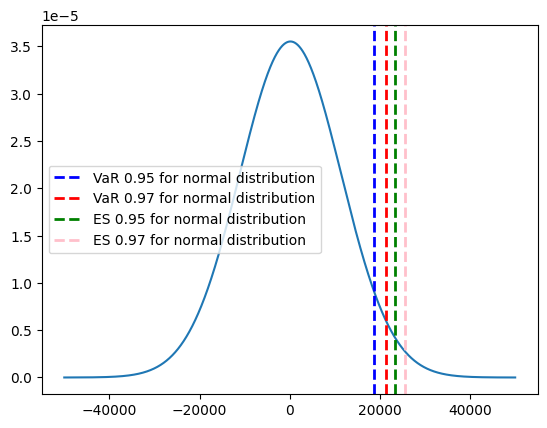

In [80]:
from scipy.stats import norm
x_axis  = np.arange(-50000,50000, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, portfolio_mean2,Std_deviation2))
plt.axvline(x=VaR_nS2_1, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for normal distribution' )
plt.axvline(x=VaR_nS2_2, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for normal distribution' )
plt.axvline(x=ES_nS21, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for normal distribution' )
plt.axvline(x=ES_nS22, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for normal distribution' )
plt.legend()
plt.show()

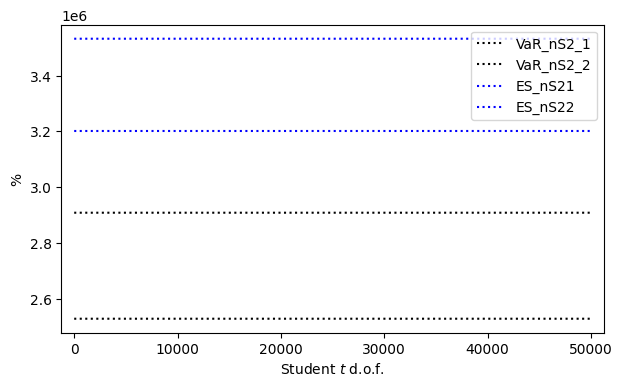

In [81]:
# Plot VaR and CVaR for the normal and t-distributions
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(np.arange(0,50000), VaR_n_1*np.ones(50000)*100, ":k", label="VaR_nS2_1")
plt.plot(np.arange(0,50000), VaR_n_2*np.ones(50000)*100, ":k", label="VaR_nS2_2")
plt.plot(np.arange(0,50000), ES_n1*np.ones(50000)*100, ":b", label="ES_nS21")
plt.plot(np.arange(0,50000), ES_n2*np.ones(50000)*100, ":b",label="ES_nS22" )
plt.xlabel("Student $t$ d.o.f.")
plt.ylabel("%")
plt.legend(loc=1)
ax.margins(x=0.025, y=0.05) # add extra padding
plt.show()

In [82]:
# Horizon and confidence levels
import math
from scipy.stats import t

# Input variables
mean =  portfolio_mean2  # Portfolio mean
std_dev = Std_deviation2 # Portfolio standard deviation
conf_level_1 = 0.95   # 95% confidence level
conf_level_2 = 0.97
sample_size = 20   # Portfolio sample size

# Calculate t-statistic
df = sample_size - 1 if sample_size < 30 else math.inf
t_stat_1 = t.ppf(conf_level_1, df)
t_stat_2 = t.ppf(conf_level_2, df)

# Calculate VaR
var_t_12 = (t_stat_1 * std_dev) + mean

var_t_22 = (t_stat_2 * std_dev) + mean

print("95% CVaR/ES t-distribution is", round(var_t_12, 2))
print("97% CVaR/ES t-distribution is", round(var_t_22, 2))


95% CVaR/ES t-distribution is 19581.74
97% CVaR/ES t-distribution is 22624.81


In [83]:
# Horizon and confidence levels
import math
from scipy.stats import t
 
# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level
portfolio_size = 20
# Calculate degrees of freedom for t-distribution
n = portfolio_size - 1

# Calculate volatility over the horizon
sig_h_t = Std_deviation2

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_t_12 = ((t.pdf(t.ppf(alpha1, n), n) / (1 - alpha1)) * sig_h_t) + portfolio_mean2

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_t_22 =  ((t.pdf(t.ppf(alpha2, n), n) / (1 - alpha2)) * sig_h_t) + portfolio_mean2 

print("95% CVaR/ES t-distribution is", round(ES_t_12, 2))
print("97% CVaR/ES t-distribution is", round(ES_t_22, 2))

95% CVaR/ES t-distribution is 20671.39
97% CVaR/ES t-distribution is 21976.68


# Scenario 3

In [84]:
#Scenario 3 is the current situation:
equity_df_S3

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,SU,TSM,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2022-04-19,166.392044,184.438080,38.608273,42.837502,130.009003,126.877510,72.124825,48.525639,53.110847,26.420000,32.618023,97.311546,43.163960,220.380127,36.810051
2022-04-20,166.223068,185.709259,38.696087,42.583561,128.039993,127.322639,72.590912,48.109810,53.736244,26.350000,33.058548,96.881012,43.771084,220.095032,37.064457
2022-04-21,165.417938,183.028961,37.964314,41.763145,124.814499,126.335640,70.329887,47.490913,53.139713,25.700001,31.890198,95.560036,43.886726,216.496902,36.477371
2022-04-22,160.815811,177.904861,36.647129,41.392006,119.635498,122.706970,68.832451,46.543224,52.187180,24.730000,30.932531,93.622604,43.761452,210.598328,35.391270
2022-04-25,161.899277,181.412903,36.383690,41.089230,123.073997,122.668251,69.536552,47.336189,52.475826,24.490000,29.936563,94.170570,44.705875,211.748550,35.449974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12,160.100006,159.289993,28.480000,39.389999,104.639999,128.500000,61.959999,41.369999,55.799999,35.520000,32.599998,86.870003,53.430000,203.009995,32.270000
2023-04-13,165.559998,162.300003,28.559999,39.930000,107.430000,128.990005,63.000000,41.470001,56.099998,36.070000,32.650002,87.050003,54.110001,205.649994,32.560001
2023-04-14,165.210007,163.220001,29.520000,39.720001,108.870003,138.729996,62.630001,41.189999,56.150002,36.720001,32.610001,87.199997,53.580002,205.080002,32.880001


In [85]:
equity_df_S3['Log_Return_AAPL'] = np.log(equity_df_S3['AAPL'] / equity_df_S3['AAPL'].shift(1))
equity_df_S3['Log_Return_AXP'] = np.log(equity_df_S3['AXP'] / equity_df_S3['AXP'].shift(1))
equity_df_S3['Log_Return_BAC'] = np.log(equity_df_S3['BAC'] / equity_df_S3['BAC'].shift(1))
equity_df_S3['Log_Return_EEM'] = np.log(equity_df_S3['EEM'] / equity_df_S3['EEM'].shift(1))
equity_df_S3['Log_Return_GOOGL'] = np.log(equity_df_S3['GOOGL'] / equity_df_S3['GOOGL'].shift(1))
equity_df_S3['Log_Return_JPM'] = np.log(equity_df_S3['JPM'] / equity_df_S3['JPM'].shift(1))
equity_df_S3['Log_Return_MU'] = np.log(equity_df_S3['MU'] / equity_df_S3['MU'].shift(1))
equity_df_S3['Log_Return_PFE'] = np.log(equity_df_S3['PFE'] / equity_df_S3['PFE'].shift(1))
equity_df_S3['Log_Return_SNY'] = np.log(equity_df_S3['SNY'] / equity_df_S3['SNY'].shift(1))
equity_df_S3['Log_Return_STRL'] = np.log(equity_df_S3['STRL'] / equity_df_S3['STRL'].shift(1))
equity_df_S3['Log_Return_SU'] = np.log(equity_df_S3['SU'] / equity_df_S3['SU'].shift(1))
equity_df_S3['Log_Return_TSM'] = np.log(equity_df_S3['TSM'] / equity_df_S3['TSM'].shift(1))
equity_df_S3['Log_Return_UL'] = np.log(equity_df_S3['UL'] / equity_df_S3['UL'].shift(1))
equity_df_S3['Log_Return_VTI'] = np.log(equity_df_S3['VTI'] / equity_df_S3['VTI'].shift(1))
equity_df_S3['Log_Return_XLF'] = np.log(equity_df_S3['XLF'] / equity_df_S3['XLF'].shift(1))
equity_df_S3

,AAPL,AXP,BAC,EEM,GOOGL,JPM,MU,PFE,SNY,STRL,...,Log_Return_JPM,Log_Return_MU,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_TSM,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-19,166.392044,184.438080,38.608273,42.837502,130.009003,126.877510,72.124825,48.525639,53.110847,26.420000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-20,166.223068,185.709259,38.696087,42.583561,128.039993,127.322639,72.590912,48.109810,53.736244,26.350000,...,0.003502,0.006441,-0.008606,0.011707,-0.002653,0.013415,-0.004434,0.013968,-0.001294,0.006888
2022-04-21,165.417938,183.028961,37.964314,41.763145,124.814499,126.335640,70.329887,47.490913,53.139713,25.700001,...,-0.007782,-0.031643,-0.012948,-0.011163,-0.024977,-0.035981,-0.013729,0.002639,-0.016483,-0.015966
2022-04-22,160.815811,177.904861,36.647129,41.392006,119.635498,122.706970,68.832451,46.543224,52.187180,24.730000,...,-0.029143,-0.021522,-0.020157,-0.018088,-0.038474,-0.030490,-0.020483,-0.002859,-0.027624,-0.030227
2022-04-25,161.899277,181.412903,36.383690,41.089230,123.073997,122.668251,69.536552,47.336189,52.475826,24.490000,...,-0.000316,0.010177,0.016894,0.005516,-0.009752,-0.032728,0.005836,0.021352,0.005447,0.001657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12,160.100006,159.289993,28.480000,39.389999,104.639999,128.500000,61.959999,41.369999,55.799999,35.520000,...,-0.000156,-0.025653,-0.010101,0.010449,0.003667,0.008935,-0.026917,0.002061,-0.004227,-0.002167
2023-04-13,165.559998,162.300003,28.559999,39.930000,107.430000,128.990005,63.000000,41.470001,56.099998,36.070000,...,0.003806,0.016646,0.002414,0.005362,0.015366,0.001533,0.002070,0.012647,0.012920,0.008947
2023-04-14,165.210007,163.220001,29.520000,39.720001,108.870003,138.729996,62.630001,41.189999,56.150002,36.720001,...,0.072795,-0.005890,-0.006775,0.000891,0.017860,-0.001226,0.001722,-0.009843,-0.002776,0.009780


In [86]:
mean_log_return3 = {}
mean_log_return3['AAPL_mean'] = equity_df_S3['Log_Return_AAPL'].mean()
mean_log_return3['AXP_mean'] = equity_df_S3['Log_Return_AXP'].mean()
mean_log_return3['BAC_mean'] = equity_df_S3['Log_Return_BAC'].mean()
mean_log_return3['EEM_mean'] = equity_df_S3['Log_Return_EEM'].mean()
mean_log_return3['GOOGL_mean'] = equity_df_S3['Log_Return_GOOGL'].mean()
mean_log_return3['JPM_mean'] = equity_df_S3['Log_Return_JPM'].mean()
mean_log_return3['MU_mean'] = equity_df_S3['Log_Return_MU'].mean()
mean_log_return3['TSM_mean'] = equity_df_S3['Log_Return_TSM'].mean()
mean_log_return3['PFE_mean'] = equity_df_S3['Log_Return_PFE'].mean()
mean_log_return3['SNY_mean'] = equity_df_S3['Log_Return_SNY'].mean()
mean_log_return3['STRL_mean'] = equity_df_S3['Log_Return_STRL'].mean()
mean_log_return3['SU_mean'] = equity_df_S3['Log_Return_SU'].mean()
mean_log_return3['UL_mean'] = equity_df_S3['Log_Return_UL'].mean()
mean_log_return3['VTI_mean'] = equity_df_S3['Log_Return_VTI'].mean()
mean_log_return3['XLF_mean'] = equity_df_S3['Log_Return_XLF'].mean()
mean_log_return3

{'AAPL_mean': 1.8736207590895892e-06,
 'AXP_mean': -0.00046004540399496066,
 'BAC_mean': -0.0009350984860695363,
 'EEM_mean': -0.00029016994509790993,
 'GOOGL_mean': -0.0008736665123209237,
 'JPM_mean': 0.0004334823075518326,
 'MU_mean': -0.0006095742880149752,
 'TSM_mean': -0.0003959647877428967,
 'PFE_mean': -0.0007182261081720628,
 'SNY_mean': 0.00015432710342506905,
 'STRL_mean': 0.0013287659127658024,
 'SU_mean': -0.00011924374496350051,
 'UL_mean': 0.0008795830073998267,
 'VTI_mean': -0.00026991094533809166,
 'XLF_mean': -0.00039365334451299847}

In [87]:
#Options Data for Leverage Factor for all 3 Scenarios:
Options_data3 = pd.DataFrame({
    'Date': ['2022-12-30', '2022-12-31'],
    'GOOGL Close': [1.08, 1.01],
    'MU Close': [2.5, 3.1],
    'AAPL Close':[23.7 , 22.2]
})
# set the Date column as the index
Options_data3.set_index('Date', inplace=True)
Options_data3

,GOOGL Close,MU Close,AAPL Close
Date,,,
2022-12-30,1.08,2.5,23.7
2022-12-31,1.01,3.1,22.2


In [88]:
#Stocks Data to calculate Leverage Factor :
#Underlying Data for Leverage Factor :
Underlying_data3 = pd.DataFrame({
    'Date': ['2022-12-30', '2022-12-31'],
    'GOOGL Close': [88.45 , 88.23],
    'MU Close': [48.91 ,50.43],
    'AAPL Close':[129.41 , 129.73]
})
# set the Date column as the index
Underlying_data3.set_index('Date', inplace=True)
Underlying_data3

,GOOGL Close,MU Close,AAPL Close
Date,,,
2022-12-30,88.45,48.91,129.41
2022-12-31,88.23,50.43,129.73


In [89]:
#To find the Delta:
Diff_bet_optoins_prices3 = pd.DataFrame()

Diff_bet_optoins_prices3['GOOGL_Vt-Vt-1'] = Options_data3['GOOGL Close'] - Options_data3['GOOGL Close'].shift(1)
Diff_bet_optoins_prices3['MU_Vt-Vt-1'] = Options_data3['MU Close'] - Options_data3['MU Close'].shift(1)
Diff_bet_optoins_prices3['AAPL_Vt-Vt-1'] = Options_data3['AAPL Close'] - Options_data3['AAPL Close'].shift(1)
Diff_bet_optoins_prices3.dropna()

,GOOGL_Vt-Vt-1,MU_Vt-Vt-1,AAPL_Vt-Vt-1
Date,,,
2022-12-31,-0.07,0.6,-1.5


In [90]:
# Difference Between Underlying:
Diff_bet_Underlying3 = pd.DataFrame()
Diff_bet_Underlying3['GOOGL'] = Underlying_data3['GOOGL Close'] - Underlying_data3['GOOGL Close'].shift(1)
Diff_bet_Underlying3['MU'] = Underlying_data3['MU Close'] - Underlying_data3['MU Close'].shift(1)
Diff_bet_Underlying3['AAPL'] = Underlying_data3['AAPL Close'] - Underlying_data3['AAPL Close'].shift(1)
Diff_bet_Underlying3.dropna()

,GOOGL,MU,AAPL
Date,,,
2022-12-31,-0.22,1.52,0.32


In [91]:
# Price of underlying / Price of Options
result_df3 = pd.DataFrame()
result_df3['GOOGL'] = Underlying_data3['GOOGL Close'] / Options_data3['GOOGL Close']
result_df3['MU'] = Underlying_data3['MU Close'] / Options_data3['MU Close']
result_df3['AAPL'] = Underlying_data3['AAPL Close'] / Options_data3['AAPL Close']
result_df3 = result_df3.iloc[0]
result_df3

GOOGL    81.898148
MU       19.564000
AAPL      5.460338
Name: 2022-12-30, dtype: float64

In [92]:
#Delta Value 
Delta3 = pd.DataFrame()
# Price of underlying / Price of Options
Delta3['GOOGL'] = Diff_bet_optoins_prices3['GOOGL_Vt-Vt-1'] / Diff_bet_Underlying3['GOOGL']
Delta3['MU'] = Diff_bet_optoins_prices3['MU_Vt-Vt-1'] / Diff_bet_Underlying3['MU']
Delta3['AAPL'] = Diff_bet_optoins_prices3['AAPL_Vt-Vt-1'] / Diff_bet_Underlying3['AAPL']
Delta3.dropna()

,GOOGL,MU,AAPL
Date,,,
2022-12-31,0.318182,0.394737,-4.6875


In [93]:
#Loss of options = Delta * result_df
L_options3 = pd.DataFrame()
L_options3['GOOGL'] = Delta3['GOOGL'] * result_df3['GOOGL']
L_options3['MU'] = Delta3['MU'] * result_df3['MU']
L_options3['AAPL'] = Delta3['AAPL'] * result_df3['AAPL']
L_options3.dropna()

,GOOGL,MU,AAPL
Date,,,
2022-12-31,26.058502,7.722632,-25.595332


In [94]:
#Covariance Matrix
Cov_DataFrame3 = equity_df_S3[['Log_Return_AAPL','Log_Return_AXP','Log_Return_BAC','Log_Return_EEM','Log_Return_GOOGL','Log_Return_JPM','Log_Return_MU','Log_Return_TSM','Log_Return_PFE','Log_Return_SNY','Log_Return_STRL','Log_Return_SU','Log_Return_UL','Log_Return_VTI','Log_Return_XLF']]

Cov_DataFrame3 = Cov_DataFrame3[:-6]
Cov_DataFrame3 = Cov_DataFrame3[4:]

Cov_DataFrame3.dropna()

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF
Date,,,,,,,,,,,,,,,
2022-04-25,0.006715,0.019527,-0.007214,-0.007342,0.028336,-0.000316,0.010177,0.005836,0.016894,0.005516,-0.009752,-0.032728,0.021352,0.005447,0.001657
2022-04-26,-0.038043,-0.030051,-0.022784,-0.022111,-0.036608,-0.030027,-0.044322,-0.036722,0.001633,-0.011618,-0.038290,0.013346,-0.015861,-0.028921,-0.025438
2022-04-27,-0.001468,-0.005726,-0.005502,0.011597,-0.037400,-0.013091,-0.009135,-0.027429,0.014377,0.007945,-0.015822,0.037179,-0.018122,0.001957,-0.000850
2022-04-28,0.044166,0.024194,0.015330,0.014310,0.036324,0.015689,0.054313,0.053496,0.015362,0.001287,0.020901,0.115076,0.029013,0.024081,0.012671
2022-04-29,-0.037292,-0.040769,-0.031179,0.003546,-0.037944,-0.032801,-0.028765,-0.024344,-0.028923,-0.040508,-0.034353,-0.026090,0.002164,-0.037429,-0.035021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-03,0.007672,-0.007118,-0.000350,0.002025,0.006055,-0.001152,-0.012172,-0.001937,0.013390,-0.004420,0.002900,0.061515,0.014719,0.002642,0.001864
2023-04-04,-0.003255,-0.007477,-0.021567,0.000000,0.003444,-0.013458,-0.040046,-0.007243,-0.010942,0.000554,-0.065539,-0.019572,0.004544,-0.006717,-0.009357
2023-04-05,-0.011355,-0.005448,-0.012226,-0.007871,-0.002390,0.001490,-0.004375,-0.021605,0.015767,0.011554,-0.017293,-0.011805,0.007152,-0.003647,-0.001254


In [95]:
#Risk Factor Change for Options is Going to be same as of their Underlying : 
Cov_DataFrame3['RFC_GOOGL_C'] = Cov_DataFrame3['Log_Return_GOOGL']
Cov_DataFrame3['RFC_MU_C'] = Cov_DataFrame3['Log_Return_MU']
Cov_DataFrame3['RFC_AAPL_C'] = Cov_DataFrame3['Log_Return_AAPL']
#Cov_DataFrame['RFC_B1'] = Bond1_RFC['RFC_B1']
#Cov_DataFrame['RFC_B2'] = Bond2_RFC['RFC_B2']
Cov_DataFrame3

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_C
Date,,,,,,,,,,,,,,,,,,
2022-04-25,0.006715,0.019527,-0.007214,-0.007342,0.028336,-0.000316,0.010177,0.005836,0.016894,0.005516,-0.009752,-0.032728,0.021352,0.005447,0.001657,0.028336,0.010177,0.006715
2022-04-26,-0.038043,-0.030051,-0.022784,-0.022111,-0.036608,-0.030027,-0.044322,-0.036722,0.001633,-0.011618,-0.038290,0.013346,-0.015861,-0.028921,-0.025438,-0.036608,-0.044322,-0.038043
2022-04-27,-0.001468,-0.005726,-0.005502,0.011597,-0.037400,-0.013091,-0.009135,-0.027429,0.014377,0.007945,-0.015822,0.037179,-0.018122,0.001957,-0.000850,-0.037400,-0.009135,-0.001468
2022-04-28,0.044166,0.024194,0.015330,0.014310,0.036324,0.015689,0.054313,0.053496,0.015362,0.001287,0.020901,0.115076,0.029013,0.024081,0.012671,0.036324,0.054313,0.044166
2022-04-29,-0.037292,-0.040769,-0.031179,0.003546,-0.037944,-0.032801,-0.028765,-0.024344,-0.028923,-0.040508,-0.034353,-0.026090,0.002164,-0.037429,-0.035021,-0.037944,-0.028765,-0.037292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-03,0.007672,-0.007118,-0.000350,0.002025,0.006055,-0.001152,-0.012172,-0.001937,0.013390,-0.004420,0.002900,0.061515,0.014719,0.002642,0.001864,0.006055,-0.012172,0.007672
2023-04-04,-0.003255,-0.007477,-0.021567,0.000000,0.003444,-0.013458,-0.040046,-0.007243,-0.010942,0.000554,-0.065539,-0.019572,0.004544,-0.006717,-0.009357,0.003444,-0.040046,-0.003255
2023-04-05,-0.011355,-0.005448,-0.012226,-0.007871,-0.002390,0.001490,-0.004375,-0.021605,0.015767,0.011554,-0.017293,-0.011805,0.007152,-0.003647,-0.001254,-0.002390,-0.004375,-0.011355


In [96]:
# Calculate covariance matrix
covariance_matrix3 = Cov_DataFrame3.cov()

# Print covariance matrix
covariance_matrix3 

,Log_Return_AAPL,Log_Return_AXP,Log_Return_BAC,Log_Return_EEM,Log_Return_GOOGL,Log_Return_JPM,Log_Return_MU,Log_Return_TSM,Log_Return_PFE,Log_Return_SNY,Log_Return_STRL,Log_Return_SU,Log_Return_UL,Log_Return_VTI,Log_Return_XLF,RFC_GOOGL_C,RFC_MU_C,RFC_AAPL_C
Log_Return_AAPL,0.000481,0.000315,0.000236,0.000169,0.000420,0.000211,0.000407,0.000334,0.000137,0.000080,0.000197,0.000205,0.000122,0.000285,0.000236,0.000420,0.000407,0.000481
Log_Return_AXP,0.000315,0.000459,0.000291,0.000159,0.000298,0.000252,0.000347,0.000271,0.000106,0.000099,0.000297,0.000221,0.000115,0.000254,0.000265,0.000298,0.000347,0.000315
Log_Return_BAC,0.000236,0.000291,0.000382,0.000138,0.000240,0.000307,0.000272,0.000204,0.000106,0.000068,0.000240,0.000230,0.000084,0.000214,0.000263,0.000240,0.000272,0.000236
Log_Return_EEM,0.000169,0.000159,0.000138,0.000174,0.000180,0.000131,0.000239,0.000228,0.000065,0.000058,0.000146,0.000171,0.000080,0.000144,0.000127,0.000180,0.000239,0.000169
Log_Return_GOOGL,0.000420,0.000298,0.000240,0.000180,0.000629,0.000208,0.000447,0.000352,0.000122,0.000094,0.000212,0.000180,0.000122,0.000297,0.000236,0.000629,0.000447,0.000420
Log_Return_JPM,0.000211,0.000252,0.000307,0.000131,0.000208,0.000317,0.000246,0.000188,0.000113,0.000100,0.000231,0.000215,0.000095,0.000194,0.000238,0.000208,0.000246,0.000211
Log_Return_MU,0.000407,0.000347,0.000272,0.000239,0.000447,0.000246,0.000794,0.000436,0.000135,0.000092,0.000295,0.000256,0.000113,0.000309,0.000264,0.000447,0.000794,0.000407
Log_Return_TSM,0.000334,0.000271,0.000204,0.000228,0.000352,0.000188,0.000436,0.000571,0.000076,0.000063,0.000227,0.000254,0.000104,0.000244,0.000201,0.000352,0.000436,0.000334
Log_Return_PFE,0.000137,0.000106,0.000106,0.000065,0.000122,0.000113,0.000135,0.000076,0.000234,0.000083,0.000110,0.000103,0.000080,0.000118,0.000107,0.000122,0.000135,0.000137
Log_Return_SNY,0.000080,0.000099,0.000068,0.000058,0.000094,0.000100,0.000092,0.000063,0.000083,0.000286,0.000107,0.000063,0.000066,0.000086,0.000089,0.000094,0.000092,0.000080


In [97]:
#Loss Distribution Of Equity :
# Stock quantities
stocks_qty_Senario3 = {'AAPL': 180, 'APTV': 162, 'BAC': 777, 'EEM': 700, 'GOOGL': 230, 'MU': 236, 'JPM': 415, 'MVST': 618, 'PFE': 564, 'SNY': 1135, 'STRL': 919, 'SU': 308, 'UL': 695, 'VTI': 136, 'XLF': 814}

# Stock prices
stock_prices3 = [166.392044, 184.438080, 38.608273, 42.837502, 130.009003, 126.877510, 72.124825, 48.525639, 53.110847, 26.420000, 32.618023, 97.311546, 43.163960, 220.380127, 36.810051]

# Calculate the loss distribution for each stock
loss_distribution3 = {}
for stock, qty in stocks_qty_Senario3.items():
    stock_price3 = stock_prices3.pop(0)
    loss = qty * stock_price3
    loss_distribution3[stock] = loss

# Print the loss distribution for each stock
print("Loss Distribution for Each Stock:")
for stock, loss in loss_distribution3.items():
    print(f"{stock}: {loss}")


Loss Distribution for Each Stock:
AAPL: 29950.56792
APTV: 29878.968960000002
BAC: 29998.628120999998
EEM: 29986.2514
GOOGL: 29902.07069
MU: 29943.09236
JPM: 29931.802375
MVST: 29988.844901999997
PFE: 29954.517708
SNY: 29986.7
STRL: 29975.963137000002
SU: 29971.956168
UL: 29998.952200000003
VTI: 29971.697271999998
XLF: 29963.381514


In [98]:
#Loss Distribution for Options :
# GOOGL :

# Price of underlying asset
Number_of_Options_GOOGL3 = 2
Price_of_Underlying_GOOGL3 = 7.9
# Loss factor for options
loss_factor_option_GOOGL3 = 26.058502

# Calculate the loss distribution for options
loss_distribution_options_GOOGL3 = Number_of_Options_GOOGL3 * Price_of_Underlying_GOOGL3 * loss_factor_option_GOOGL3
print("Loss Distribution of GOOGL option :", loss_distribution_options_GOOGL3)


# MU

# Price of underlying asset
Number_of_Options_MU3 = 2
Price_of_Underlying_MU3 = 4.05
# Loss factor for options
loss_factor_option_MU3 = 7.722632

# Calculate the loss distribution for options
loss_distribution_options_MU3 = Number_of_Options_MU3 * Price_of_Underlying_MU3 * loss_factor_option_MU3
print("Loss Distribution of MU option :", loss_distribution_options_MU3)

#AAPL

# Price of underlying asset
Number_of_Options_AAPL3 = 2
Price_of_Underlying_AAPL3 = 1.95
# Loss factor for options
loss_factor_option_AAPL3 = -25.595332

# Calculate the loss distribution for options
loss_distribution_options_AAPL3 = Number_of_Options_AAPL3 * Price_of_Underlying_AAPL3 * loss_factor_option_AAPL3
print("Loss Distribution of APPL option :", loss_distribution_options_AAPL3)

Loss Distribution of GOOGL option : 411.7243316
Loss Distribution of MU option : 62.5533192
Loss Distribution of APPL option : -99.82179479999999


In [99]:
#This is a C Vector:
## Create a list to store the loss distributions
portfolio_loss_distribution3 = []

# Append the loss distributions for stocks to the list
for stock, loss in loss_distribution3.items():
    portfolio_loss_distribution3.append(loss)

# Append the loss distributions for options to the list
portfolio_loss_distribution3.append(loss_distribution_options_GOOGL3)
portfolio_loss_distribution3.append(loss_distribution_options_MU3)
portfolio_loss_distribution3.append(loss_distribution_options_AAPL3)

# Append the loss distributions for bonds to the list
#portfolio_loss_distribution.append(Loss_Dis_Bond1)
#portfolio_loss_distribution.append(Loss_Dis_Bond2)

portfolio_loss_distribution3

[29950.56792,
 29878.968960000002,
 29998.628120999998,
 29986.2514,
 29902.07069,
 29943.09236,
 29931.802375,
 29988.844901999997,
 29954.517708,
 29986.7,
 29975.963137000002,
 29971.956168,
 29998.952200000003,
 29971.697271999998,
 29963.381514,
 411.7243316,
 62.5533192,
 -99.82179479999999]

In [100]:
mean_log_return3

{'AAPL_mean': 1.8736207590895892e-06,
 'AXP_mean': -0.00046004540399496066,
 'BAC_mean': -0.0009350984860695363,
 'EEM_mean': -0.00029016994509790993,
 'GOOGL_mean': -0.0008736665123209237,
 'JPM_mean': 0.0004334823075518326,
 'MU_mean': -0.0006095742880149752,
 'TSM_mean': -0.0003959647877428967,
 'PFE_mean': -0.0007182261081720628,
 'SNY_mean': 0.00015432710342506905,
 'STRL_mean': 0.0013287659127658024,
 'SU_mean': -0.00011924374496350051,
 'UL_mean': 0.0008795830073998267,
 'VTI_mean': -0.00026991094533809166,
 'XLF_mean': -0.00039365334451299847}

In [101]:
mean_log_return_list3 = list(mean_log_return3.values())
mean_log_return_list3

[1.8736207590895892e-06,
 -0.00046004540399496066,
 -0.0009350984860695363,
 -0.00029016994509790993,
 -0.0008736665123209237,
 0.0004334823075518326,
 -0.0006095742880149752,
 -0.0003959647877428967,
 -0.0007182261081720628,
 0.00015432710342506905,
 0.0013287659127658024,
 -0.00011924374496350051,
 0.0008795830073998267,
 -0.00026991094533809166,
 -0.00039365334451299847]

In [102]:
Options_Mean3 = [-0.0008736665123209237, -0.0006095742880149752, 1.8736207590895892]
mean_log_return_list3.extend(Options_Mean3)

In [103]:
#Bonds_Mean = [-0.000279 , -0.000065]
#mean_log_return_list.extend(Bonds_Mean)
mean_log_return_list3

[1.8736207590895892e-06,
 -0.00046004540399496066,
 -0.0009350984860695363,
 -0.00029016994509790993,
 -0.0008736665123209237,
 0.0004334823075518326,
 -0.0006095742880149752,
 -0.0003959647877428967,
 -0.0007182261081720628,
 0.00015432710342506905,
 0.0013287659127658024,
 -0.00011924374496350051,
 0.0008795830073998267,
 -0.00026991094533809166,
 -0.00039365334451299847,
 -0.0008736665123209237,
 -0.0006095742880149752,
 1.8736207590895892]

In [104]:
#Portfolio Mean:
portfolio_mean3 = np.dot(portfolio_loss_distribution3, mean_log_return_list3)
portfolio_mean3 

-255.26078767002713

In [105]:
#Varriance of Portfolio:
portfolio_varriance3 = np.dot(portfolio_loss_distribution3 ,covariance_matrix3)
portfolio_varriance3 = np.dot(portfolio_varriance3.T , portfolio_loss_distribution3 )
portfolio_varriance3

41500691.539164014

In [106]:
#Std deviation : 
Std_deviation3 = portfolio_varriance3**0.5
Std_deviation3

6442.103036987534

In [112]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence level
h = 250 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
alpha2 = 0.03 # 97% confidence level
# Calculate volatility over the horizon
sig_h = Std_deviation3

# Calculate VaR for the portfolio for 0.95
VaR_nS3_1 = norm.ppf(1 - alpha1) * sig_h + portfolio_mean3

# Calculate VaR for the portfolio for 0.97
VaR_nS3_2 = norm.ppf(1 - alpha2) * sig_h + portfolio_mean3

print("95% VaR is", round(VaR_nS3_1, 2))
print("97% VaR is", round(VaR_nS3_2, 2))

95% VaR is 10341.06
97% VaR is 11861.01


In [113]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence levels
h = 250 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level

# Calculate volatility over the horizon
sig_h = Std_deviation3 


# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_nS31 = (1 / (1 - alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean3

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_nS32 = (1 / (1 - alpha2)) * (norm.pdf(norm.ppf(alpha2)) * sig_h) + portfolio_mean3

print("95% CVaR/ES is", round(ES_nS31, 2))
print("97% CVaR/ES is", round(ES_nS32, 2))

95% CVaR/ES is 13032.95
97% CVaR/ES is 14355.85


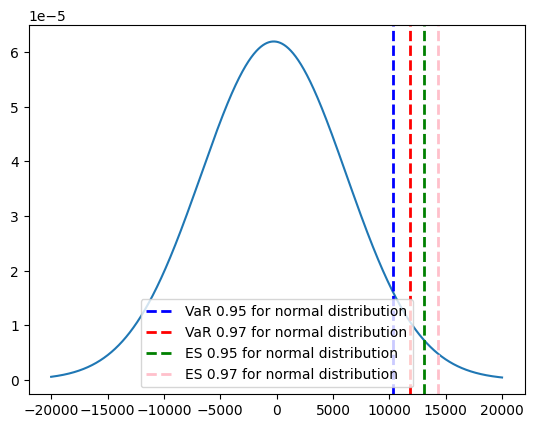

In [109]:
from scipy.stats import norm
x_axis  = np.arange(-20000,20000, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, portfolio_mean3,Std_deviation3))
plt.axvline(x=VaR_nS2_1, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for normal distribution' )
plt.axvline(x=VaR_nS2_2, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for normal distribution' )
plt.axvline(x=ES_nS21, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for normal distribution' )
plt.axvline(x=ES_nS22, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for normal distribution' )
plt.legend()
plt.show()

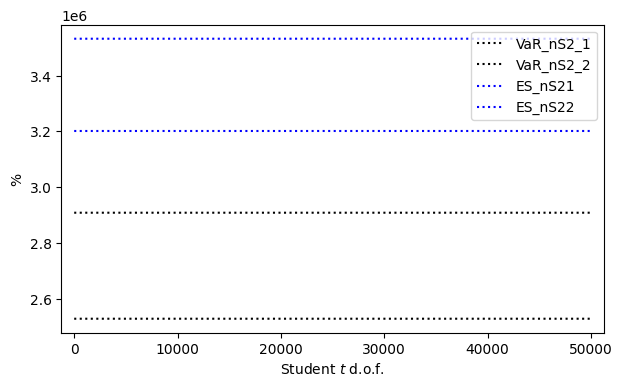

In [110]:
# Plot VaR and CVaR for the normal and t-distributions
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(np.arange(0,50000), VaR_n_1*np.ones(50000)*100, ":k", label="VaR_nS2_1")
plt.plot(np.arange(0,50000), VaR_n_2*np.ones(50000)*100, ":k", label="VaR_nS2_2")
plt.plot(np.arange(0,50000), ES_n1*np.ones(50000)*100, ":b", label="ES_nS21")
plt.plot(np.arange(0,50000), ES_n2*np.ones(50000)*100, ":b",label="ES_nS22" )
plt.xlabel("Student $t$ d.o.f.")
plt.ylabel("%")
plt.legend(loc=1)
ax.margins(x=0.025, y=0.05) # add extra padding
plt.show()

In [111]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = Std_deviation2  # standard deviation of the portfolio
portfolio_mean = portfolio_mean2  # expected return of the portfolio
confidence_level = 0.95  # confidence level
confidence_level2 = 0.97
degrees_of_freedom = 10  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)
t_value2 = t.ppf(1 - confidence_level2, degrees_of_freedom)

# Calculate the VaR
VaR_t13 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the VaR
VaR_t23 = (portfolio_mean - t_value2 * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t13 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

# Calculate the expected shortfall
ES_t23 = ((portfolio_mean - t_value2 * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value2**2) * t.pdf(t_value2, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t13, 2))
print("95% CVaR/ES t distribution is", round(ES_t13, 2))
print("97% VaR t distribution is", round(VaR_t23, 2))
print("97% CVaR/ES t distribution is", round(ES_t23, 2))

95% VaR t distribution is 21511.62
95% CVaR/ES t distribution is 45861.56
97% VaR t distribution is 25137.83
97% CVaR/ES t distribution is 41585.05


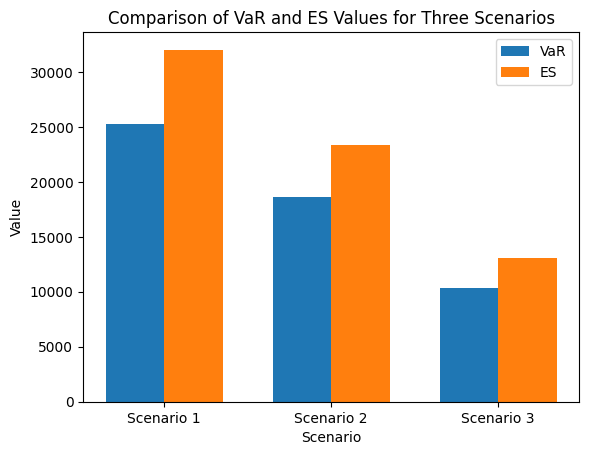

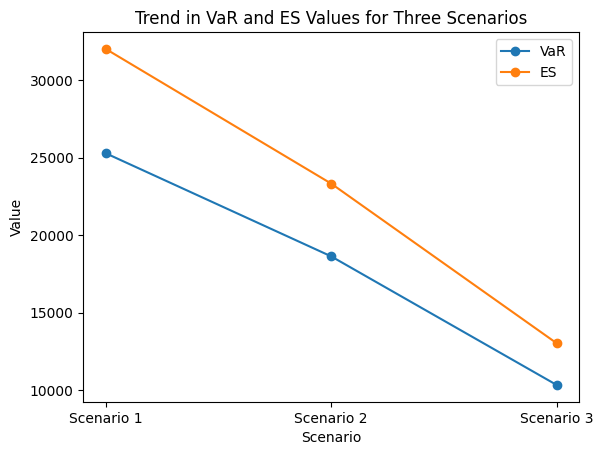

In [4]:
import matplotlib.pyplot as plt

# Define the VaR and ES values for each scenario
VaR = [25285.96, 18634.97, 10341.06]
ES = [32014.67, 23329.11, 13032.95]

# Define the x-axis labels for the bar chart and line graph
labels = ['Scenario 1', 'Scenario 2', 'Scenario 3']
x = range(len(labels))

# Create a bar chart to compare the VaR and ES values
fig, ax = plt.subplots()
ax.bar(x, VaR, width=0.35, label='VaR')
ax.bar([i+0.35 for i in x], ES, width=0.35, label='ES')
ax.set_xticks([i+0.175 for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Scenario')
ax.set_ylabel('Value')
ax.set_title('Comparison of VaR and ES Values for Three Scenarios')
ax.legend()
plt.show()

# Create a line graph to show the trend in VaR and ES values over time
fig, ax = plt.subplots()
ax.plot(x, VaR, marker='o', label='VaR')
ax.plot(x, ES, marker='o', label='ES')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Scenario')
ax.set_ylabel('Value')
ax.set_title('Trend in VaR and ES Values for Three Scenarios')
ax.legend()
plt.show()
